In [1]:
import pandas as pd
import numpy as np

In [2]:
import keras

Using TensorFlow backend.


Downloading The Data from the link

In [3]:
!wget https://cocl.us/concrete_data

--2020-06-27 04:43:09--  https://cocl.us/concrete_data
Resolving cocl.us (cocl.us)... 158.85.108.83, 158.85.108.86, 169.48.113.194
Connecting to cocl.us (cocl.us)|158.85.108.83|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv [following]
--2020-06-27 04:43:12--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58988 (58K) [text/csv]
Saving to: ‘concrete_data’

100%[======================================>] 58,988      --.-K/s   in 0.1s    

2020-06-27 04:43:13 (388

In [5]:
#Read the downloaded data into a pandas DataFrame
df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv')

In [6]:
#Checking the data in the Dataframe
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [8]:
#Statistical Analysis of the Data
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [9]:
#Checking the type of Data in each Column
df.dtypes

Cement                float64
Blast Furnace Slag    float64
Fly Ash               float64
Water                 float64
Superplasticizer      float64
Coarse Aggregate      float64
Fine Aggregate        float64
Age                     int64
Strength              float64
dtype: object

In [10]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [12]:
#Differentiating Features and Classification Label
num_columns = ['Cement','Blast Furnace Slag','Fly Ash','Water','Superplasticizer', 'Coarse Aggregate','Fine Aggregate']
X = df[num_columns]
y = df['Strength']
X.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5


# Part A

In [13]:
#Making a regression model as mentioned
from keras.models import Sequential
from keras.layers import Dense

n_cols = X.shape[1] 

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(n_cols,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')


Instructions for updating:
Colocations handled automatically by placer.


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

K = 50
mean_error = np.zeros((K-1))

for n in range(1,K):
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3)
    #Train Model and Predict  
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=2)
    yhat=model.predict(X_test)
    mean_error[n-1] = mean_squared_error(y_test, yhat)

mean_error



Train on 721 samples, validate on 309 samples
Epoch 1/50
 - 1s - loss: 146.9098 - val_loss: 152.1987
Epoch 2/50
 - 1s - loss: 155.9428 - val_loss: 168.5536
Epoch 3/50
 - 0s - loss: 161.4652 - val_loss: 151.6453
Epoch 4/50
 - 1s - loss: 148.8567 - val_loss: 161.0209
Epoch 5/50
 - 0s - loss: 148.8206 - val_loss: 153.6423
Epoch 6/50
 - 1s - loss: 147.1637 - val_loss: 152.3274
Epoch 7/50
 - 1s - loss: 145.5199 - val_loss: 159.4079
Epoch 8/50
 - 1s - loss: 146.0486 - val_loss: 152.4350
Epoch 9/50
 - 1s - loss: 145.9697 - val_loss: 153.5561
Epoch 10/50
 - 0s - loss: 150.0148 - val_loss: 152.5382
Epoch 11/50
 - 1s - loss: 147.0871 - val_loss: 157.7480
Epoch 12/50
 - 1s - loss: 148.1729 - val_loss: 151.8743
Epoch 13/50
 - 0s - loss: 146.3843 - val_loss: 151.3496
Epoch 14/50
 - 1s - loss: 146.2693 - val_loss: 170.7580
Epoch 15/50
 - 0s - loss: 152.5831 - val_loss: 151.3901
Epoch 16/50
 - 1s - loss: 148.5801 - val_loss: 156.9252
Epoch 17/50
 - 0s - loss: 150.2267 - val_loss: 151.9965
Epoch 18/50

Epoch 46/50
 - 1s - loss: 139.8047 - val_loss: 151.2745
Epoch 47/50
 - 0s - loss: 139.0125 - val_loss: 150.3004
Epoch 48/50
 - 0s - loss: 137.7318 - val_loss: 150.4308
Epoch 49/50
 - 0s - loss: 138.2280 - val_loss: 174.1138
Epoch 50/50
 - 1s - loss: 145.1698 - val_loss: 149.7096
Train on 721 samples, validate on 309 samples
Epoch 1/50
 - 1s - loss: 148.2801 - val_loss: 123.2932
Epoch 2/50
 - 0s - loss: 148.3261 - val_loss: 122.9693
Epoch 3/50
 - 0s - loss: 148.3304 - val_loss: 128.0381
Epoch 4/50
 - 1s - loss: 152.5702 - val_loss: 125.1884
Epoch 5/50
 - 1s - loss: 150.0339 - val_loss: 124.4636
Epoch 6/50
 - 0s - loss: 147.3438 - val_loss: 132.1107
Epoch 7/50
 - 0s - loss: 154.8136 - val_loss: 131.2114
Epoch 8/50
 - 0s - loss: 153.4152 - val_loss: 126.9746
Epoch 9/50
 - 1s - loss: 146.8220 - val_loss: 124.5733
Epoch 10/50
 - 0s - loss: 149.6283 - val_loss: 127.0140
Epoch 11/50
 - 1s - loss: 146.8216 - val_loss: 123.3773
Epoch 12/50
 - 0s - loss: 147.7292 - val_loss: 126.7116
Epoch 13/50

Epoch 41/50
 - 0s - loss: 135.2838 - val_loss: 138.9656
Epoch 42/50
 - 1s - loss: 135.9437 - val_loss: 138.1522
Epoch 43/50
 - 1s - loss: 135.4473 - val_loss: 145.0898
Epoch 44/50
 - 1s - loss: 135.0789 - val_loss: 140.2636
Epoch 45/50
 - 1s - loss: 138.1810 - val_loss: 143.0721
Epoch 46/50
 - 0s - loss: 135.9668 - val_loss: 138.0470
Epoch 47/50
 - 0s - loss: 137.1170 - val_loss: 139.6055
Epoch 48/50
 - 1s - loss: 143.0124 - val_loss: 152.8084
Epoch 49/50
 - 0s - loss: 134.2441 - val_loss: 145.1609
Epoch 50/50
 - 0s - loss: 141.4388 - val_loss: 139.2903
Train on 721 samples, validate on 309 samples
Epoch 1/50
 - 0s - loss: 134.8817 - val_loss: 137.4948
Epoch 2/50
 - 0s - loss: 134.1685 - val_loss: 141.1005
Epoch 3/50
 - 1s - loss: 135.5733 - val_loss: 145.9060
Epoch 4/50
 - 0s - loss: 137.3584 - val_loss: 137.8284
Epoch 5/50
 - 1s - loss: 134.8310 - val_loss: 145.2320
Epoch 6/50
 - 1s - loss: 136.9764 - val_loss: 143.2520
Epoch 7/50
 - 1s - loss: 134.5909 - val_loss: 138.9448
Epoch 8/5

Epoch 36/50
 - 0s - loss: 131.8801 - val_loss: 145.0962
Epoch 37/50
 - 1s - loss: 134.2462 - val_loss: 146.3271
Epoch 38/50
 - 1s - loss: 128.2822 - val_loss: 144.1994
Epoch 39/50
 - 0s - loss: 128.1772 - val_loss: 150.4944
Epoch 40/50
 - 0s - loss: 129.6794 - val_loss: 144.5631
Epoch 41/50
 - 1s - loss: 127.9843 - val_loss: 144.9321
Epoch 42/50
 - 1s - loss: 129.3783 - val_loss: 144.3024
Epoch 43/50
 - 1s - loss: 131.1306 - val_loss: 144.9603
Epoch 44/50
 - 0s - loss: 129.5875 - val_loss: 145.4515
Epoch 45/50
 - 1s - loss: 131.6359 - val_loss: 147.9759
Epoch 46/50
 - 1s - loss: 127.9274 - val_loss: 146.5982
Epoch 47/50
 - 1s - loss: 127.8340 - val_loss: 145.7082
Epoch 48/50
 - 2s - loss: 126.6551 - val_loss: 155.2131
Epoch 49/50
 - 1s - loss: 136.3400 - val_loss: 145.9624
Epoch 50/50
 - 1s - loss: 130.5601 - val_loss: 149.0405
Train on 721 samples, validate on 309 samples
Epoch 1/50
 - 0s - loss: 141.4102 - val_loss: 121.7145
Epoch 2/50
 - 0s - loss: 145.4617 - val_loss: 133.0937
Epoc

Epoch 31/50
 - 0s - loss: 126.5079 - val_loss: 146.9182
Epoch 32/50
 - 1s - loss: 129.8951 - val_loss: 152.1028
Epoch 33/50
 - 1s - loss: 132.7020 - val_loss: 145.1717
Epoch 34/50
 - 1s - loss: 125.7350 - val_loss: 147.4028
Epoch 35/50
 - 1s - loss: 124.3225 - val_loss: 146.0445
Epoch 36/50
 - 1s - loss: 122.8598 - val_loss: 144.5292
Epoch 37/50
 - 1s - loss: 123.2557 - val_loss: 145.2526
Epoch 38/50
 - 1s - loss: 123.2514 - val_loss: 144.9944
Epoch 39/50
 - 1s - loss: 122.0947 - val_loss: 148.7831
Epoch 40/50
 - 0s - loss: 124.8408 - val_loss: 145.0890
Epoch 41/50
 - 0s - loss: 121.5224 - val_loss: 144.7331
Epoch 42/50
 - 1s - loss: 123.5328 - val_loss: 145.3616
Epoch 43/50
 - 1s - loss: 124.2078 - val_loss: 144.2165
Epoch 44/50
 - 0s - loss: 123.5170 - val_loss: 146.2720
Epoch 45/50
 - 1s - loss: 124.7655 - val_loss: 146.8797
Epoch 46/50
 - 1s - loss: 124.7461 - val_loss: 145.0481
Epoch 47/50
 - 1s - loss: 123.4141 - val_loss: 145.6825
Epoch 48/50
 - 1s - loss: 125.4272 - val_loss: 1

Epoch 26/50
 - 0s - loss: 127.1825 - val_loss: 141.3979
Epoch 27/50
 - 1s - loss: 127.4599 - val_loss: 130.5922
Epoch 28/50
 - 1s - loss: 127.7180 - val_loss: 135.8517
Epoch 29/50
 - 1s - loss: 128.6663 - val_loss: 137.1786
Epoch 30/50
 - 0s - loss: 125.9785 - val_loss: 132.4875
Epoch 31/50
 - 1s - loss: 126.4623 - val_loss: 131.1401
Epoch 32/50
 - 1s - loss: 125.9005 - val_loss: 133.2947
Epoch 33/50
 - 1s - loss: 129.9770 - val_loss: 155.5902
Epoch 34/50
 - 0s - loss: 132.7073 - val_loss: 132.6265
Epoch 35/50
 - 0s - loss: 127.7988 - val_loss: 134.0438
Epoch 36/50
 - 1s - loss: 127.9731 - val_loss: 136.7147
Epoch 37/50
 - 0s - loss: 127.4296 - val_loss: 135.7151
Epoch 38/50
 - 1s - loss: 127.2107 - val_loss: 133.6655
Epoch 39/50
 - 1s - loss: 126.5294 - val_loss: 134.1472
Epoch 40/50
 - 0s - loss: 131.7074 - val_loss: 139.9563
Epoch 41/50
 - 0s - loss: 125.4109 - val_loss: 132.1212
Epoch 42/50
 - 1s - loss: 128.4882 - val_loss: 135.3673
Epoch 43/50
 - 0s - loss: 124.5897 - val_loss: 1

Epoch 21/50
 - 1s - loss: 123.1960 - val_loss: 125.3087
Epoch 22/50
 - 1s - loss: 123.7224 - val_loss: 129.6924
Epoch 23/50
 - 1s - loss: 127.3110 - val_loss: 128.7009
Epoch 24/50
 - 1s - loss: 126.0101 - val_loss: 144.4607
Epoch 25/50
 - 1s - loss: 124.1010 - val_loss: 155.5224
Epoch 26/50
 - 0s - loss: 128.8344 - val_loss: 129.1217
Epoch 27/50
 - 0s - loss: 125.0411 - val_loss: 128.8505
Epoch 28/50
 - 1s - loss: 127.0961 - val_loss: 128.4297
Epoch 29/50
 - 1s - loss: 128.3293 - val_loss: 131.0666
Epoch 30/50
 - 1s - loss: 124.6256 - val_loss: 136.0488
Epoch 31/50
 - 1s - loss: 126.2434 - val_loss: 129.5178
Epoch 32/50
 - 1s - loss: 124.6907 - val_loss: 129.7649
Epoch 33/50
 - 0s - loss: 123.9802 - val_loss: 126.7465
Epoch 34/50
 - 0s - loss: 125.5187 - val_loss: 125.4636
Epoch 35/50
 - 2s - loss: 124.5293 - val_loss: 132.3747
Epoch 36/50
 - 1s - loss: 127.9249 - val_loss: 136.3679
Epoch 37/50
 - 1s - loss: 125.0911 - val_loss: 128.1602
Epoch 38/50
 - 1s - loss: 122.8112 - val_loss: 1

Epoch 16/50
 - 0s - loss: 119.1073 - val_loss: 131.3057
Epoch 17/50
 - 1s - loss: 119.3974 - val_loss: 132.6481
Epoch 18/50
 - 0s - loss: 119.4332 - val_loss: 130.3240
Epoch 19/50
 - 1s - loss: 120.2246 - val_loss: 131.6510
Epoch 20/50
 - 0s - loss: 119.6102 - val_loss: 132.6059
Epoch 21/50
 - 1s - loss: 121.1070 - val_loss: 129.7599
Epoch 22/50
 - 0s - loss: 119.9513 - val_loss: 130.8644
Epoch 23/50
 - 0s - loss: 122.8113 - val_loss: 130.4023
Epoch 24/50
 - 0s - loss: 118.0690 - val_loss: 153.1116
Epoch 25/50
 - 2s - loss: 132.6049 - val_loss: 132.8944
Epoch 26/50
 - 1s - loss: 123.7523 - val_loss: 137.1089
Epoch 27/50
 - 1s - loss: 119.0124 - val_loss: 130.5752
Epoch 28/50
 - 1s - loss: 119.0688 - val_loss: 129.9846
Epoch 29/50
 - 1s - loss: 122.0327 - val_loss: 131.3133
Epoch 30/50
 - 1s - loss: 118.8427 - val_loss: 131.6606
Epoch 31/50
 - 1s - loss: 119.2962 - val_loss: 130.5033
Epoch 32/50
 - 1s - loss: 123.7272 - val_loss: 138.0749
Epoch 33/50
 - 2s - loss: 119.2771 - val_loss: 1

Epoch 11/50
 - 1s - loss: 125.1030 - val_loss: 118.1020
Epoch 12/50
 - 1s - loss: 123.1259 - val_loss: 128.5032
Epoch 13/50
 - 0s - loss: 127.6882 - val_loss: 121.0658
Epoch 14/50
 - 0s - loss: 120.8847 - val_loss: 121.3629
Epoch 15/50
 - 0s - loss: 120.8698 - val_loss: 118.1542
Epoch 16/50
 - 1s - loss: 120.9916 - val_loss: 126.3193
Epoch 17/50
 - 1s - loss: 125.6133 - val_loss: 119.0374
Epoch 18/50
 - 1s - loss: 126.1253 - val_loss: 134.9817
Epoch 19/50
 - 1s - loss: 121.7893 - val_loss: 119.8494
Epoch 20/50
 - 2s - loss: 119.5971 - val_loss: 120.8771
Epoch 21/50
 - 1s - loss: 121.5050 - val_loss: 121.8288
Epoch 22/50
 - 2s - loss: 120.0303 - val_loss: 120.1846
Epoch 23/50
 - 2s - loss: 120.8173 - val_loss: 119.7154
Epoch 24/50
 - 1s - loss: 122.1620 - val_loss: 122.5670
Epoch 25/50
 - 0s - loss: 120.4755 - val_loss: 127.8963
Epoch 26/50
 - 0s - loss: 119.9679 - val_loss: 123.6866
Epoch 27/50
 - 1s - loss: 120.5085 - val_loss: 121.0296
Epoch 28/50
 - 1s - loss: 122.9142 - val_loss: 1

Epoch 6/50
 - 1s - loss: 126.7526 - val_loss: 113.6469
Epoch 7/50
 - 1s - loss: 128.5092 - val_loss: 104.3922
Epoch 8/50
 - 1s - loss: 126.8832 - val_loss: 107.7169
Epoch 9/50
 - 1s - loss: 124.4967 - val_loss: 110.2588
Epoch 10/50
 - 1s - loss: 124.0680 - val_loss: 106.4882
Epoch 11/50
 - 1s - loss: 124.5554 - val_loss: 105.8533
Epoch 12/50
 - 1s - loss: 126.5594 - val_loss: 111.6095
Epoch 13/50
 - 0s - loss: 122.7931 - val_loss: 108.8069
Epoch 14/50
 - 0s - loss: 124.2368 - val_loss: 110.2663
Epoch 15/50
 - 0s - loss: 124.3854 - val_loss: 109.2889
Epoch 16/50
 - 1s - loss: 123.0958 - val_loss: 107.5659
Epoch 17/50
 - 0s - loss: 123.2728 - val_loss: 108.5262
Epoch 18/50
 - 0s - loss: 122.6198 - val_loss: 114.0142
Epoch 19/50
 - 0s - loss: 126.3870 - val_loss: 111.6074
Epoch 20/50
 - 1s - loss: 123.1039 - val_loss: 108.7942
Epoch 21/50
 - 2s - loss: 122.2919 - val_loss: 112.2900
Epoch 22/50
 - 1s - loss: 123.8706 - val_loss: 109.7886
Epoch 23/50
 - 0s - loss: 125.9364 - val_loss: 116.4

 - 1s - loss: 117.6886 - val_loss: 119.7782
Epoch 2/50
 - 0s - loss: 115.6180 - val_loss: 122.3524
Epoch 3/50
 - 0s - loss: 115.7706 - val_loss: 123.8010
Epoch 4/50
 - 1s - loss: 117.3848 - val_loss: 122.6996
Epoch 5/50
 - 0s - loss: 117.0346 - val_loss: 121.9888
Epoch 6/50
 - 1s - loss: 114.9282 - val_loss: 120.6575
Epoch 7/50
 - 0s - loss: 115.7204 - val_loss: 124.9264
Epoch 8/50
 - 1s - loss: 116.7149 - val_loss: 121.9326
Epoch 9/50
 - 0s - loss: 115.0209 - val_loss: 120.9673
Epoch 10/50
 - 2s - loss: 117.3078 - val_loss: 123.2217
Epoch 11/50
 - 2s - loss: 114.3111 - val_loss: 124.6678
Epoch 12/50
 - 1s - loss: 114.7935 - val_loss: 124.2299
Epoch 13/50
 - 1s - loss: 115.2890 - val_loss: 121.2457
Epoch 14/50
 - 1s - loss: 114.8962 - val_loss: 122.8732
Epoch 15/50
 - 0s - loss: 114.6193 - val_loss: 122.0512
Epoch 16/50
 - 1s - loss: 113.6464 - val_loss: 122.9072
Epoch 17/50
 - 0s - loss: 114.7330 - val_loss: 122.4146
Epoch 18/50
 - 1s - loss: 118.3639 - val_loss: 122.4357
Epoch 19/50


Epoch 47/50
 - 1s - loss: 110.7546 - val_loss: 131.9897
Epoch 48/50
 - 1s - loss: 113.7431 - val_loss: 135.6516
Epoch 49/50
 - 1s - loss: 113.5182 - val_loss: 132.6025
Epoch 50/50
 - 0s - loss: 114.1516 - val_loss: 134.8467
Train on 721 samples, validate on 309 samples
Epoch 1/50
 - 0s - loss: 118.2667 - val_loss: 117.6443
Epoch 2/50
 - 1s - loss: 116.5025 - val_loss: 117.9910
Epoch 3/50
 - 1s - loss: 116.8191 - val_loss: 117.1424
Epoch 4/50
 - 1s - loss: 118.8949 - val_loss: 116.9299
Epoch 5/50
 - 1s - loss: 115.7299 - val_loss: 118.6416
Epoch 6/50
 - 1s - loss: 120.5222 - val_loss: 117.3646
Epoch 7/50
 - 1s - loss: 118.5031 - val_loss: 117.6244
Epoch 8/50
 - 1s - loss: 116.8201 - val_loss: 121.5866
Epoch 9/50
 - 0s - loss: 116.2395 - val_loss: 121.4875
Epoch 10/50
 - 1s - loss: 115.7852 - val_loss: 117.8557
Epoch 11/50
 - 1s - loss: 116.3306 - val_loss: 120.6308
Epoch 12/50
 - 2s - loss: 116.7850 - val_loss: 120.7441
Epoch 13/50
 - 1s - loss: 117.1720 - val_loss: 120.7201
Epoch 14/50

Epoch 42/50
 - 1s - loss: 113.0839 - val_loss: 131.2750
Epoch 43/50
 - 0s - loss: 116.8277 - val_loss: 129.9541
Epoch 44/50
 - 0s - loss: 113.5217 - val_loss: 130.7457
Epoch 45/50
 - 0s - loss: 112.4566 - val_loss: 129.3521
Epoch 46/50
 - 0s - loss: 112.2846 - val_loss: 131.3063
Epoch 47/50
 - 1s - loss: 112.0527 - val_loss: 131.6877
Epoch 48/50
 - 0s - loss: 113.1227 - val_loss: 132.8627
Epoch 49/50
 - 1s - loss: 111.5415 - val_loss: 131.6863
Epoch 50/50
 - 0s - loss: 111.6828 - val_loss: 133.9981
Train on 721 samples, validate on 309 samples
Epoch 1/50
 - 1s - loss: 118.0853 - val_loss: 116.6139
Epoch 2/50
 - 0s - loss: 116.9724 - val_loss: 131.4789
Epoch 3/50
 - 0s - loss: 120.0037 - val_loss: 124.9910
Epoch 4/50
 - 1s - loss: 119.7390 - val_loss: 120.9044
Epoch 5/50
 - 2s - loss: 117.0328 - val_loss: 119.3734
Epoch 6/50
 - 1s - loss: 117.3198 - val_loss: 123.5550
Epoch 7/50
 - 1s - loss: 116.9554 - val_loss: 121.2636
Epoch 8/50
 - 1s - loss: 116.3904 - val_loss: 121.8417
Epoch 9/50

Epoch 37/50
 - 1s - loss: 113.6758 - val_loss: 122.1293
Epoch 38/50
 - 0s - loss: 114.9776 - val_loss: 122.6711
Epoch 39/50
 - 0s - loss: 114.0379 - val_loss: 121.9053
Epoch 40/50
 - 0s - loss: 116.8114 - val_loss: 124.6122
Epoch 41/50
 - 1s - loss: 115.8311 - val_loss: 130.8125
Epoch 42/50
 - 0s - loss: 113.4956 - val_loss: 121.1282
Epoch 43/50
 - 1s - loss: 111.7605 - val_loss: 128.0666
Epoch 44/50
 - 1s - loss: 115.0445 - val_loss: 123.4338
Epoch 45/50
 - 1s - loss: 118.8263 - val_loss: 136.0416
Epoch 46/50
 - 1s - loss: 115.6915 - val_loss: 122.3992
Epoch 47/50
 - 1s - loss: 114.2718 - val_loss: 121.9868
Epoch 48/50
 - 0s - loss: 115.5697 - val_loss: 122.1041
Epoch 49/50
 - 0s - loss: 113.9847 - val_loss: 122.4842
Epoch 50/50
 - 1s - loss: 114.8564 - val_loss: 123.1894
Train on 721 samples, validate on 309 samples
Epoch 1/50
 - 1s - loss: 121.2577 - val_loss: 112.1284
Epoch 2/50
 - 1s - loss: 120.2026 - val_loss: 113.8722
Epoch 3/50
 - 1s - loss: 118.1081 - val_loss: 113.2530
Epoch

Epoch 32/50
 - 0s - loss: 114.9598 - val_loss: 119.6699
Epoch 33/50
 - 0s - loss: 114.3243 - val_loss: 119.2262
Epoch 34/50
 - 0s - loss: 113.7396 - val_loss: 118.5527
Epoch 35/50
 - 0s - loss: 113.1353 - val_loss: 119.7392
Epoch 36/50
 - 1s - loss: 114.9884 - val_loss: 119.5608
Epoch 37/50
 - 1s - loss: 114.5640 - val_loss: 120.1434
Epoch 38/50
 - 0s - loss: 113.8566 - val_loss: 125.1135
Epoch 39/50
 - 1s - loss: 117.5756 - val_loss: 123.2833
Epoch 40/50
 - 1s - loss: 114.9070 - val_loss: 132.6733
Epoch 41/50
 - 1s - loss: 114.9994 - val_loss: 123.0521
Epoch 42/50
 - 1s - loss: 112.7860 - val_loss: 120.3817
Epoch 43/50
 - 1s - loss: 118.2318 - val_loss: 130.8849
Epoch 44/50
 - 1s - loss: 116.0133 - val_loss: 124.8465
Epoch 45/50
 - 0s - loss: 115.5495 - val_loss: 133.9710
Epoch 46/50
 - 0s - loss: 115.9737 - val_loss: 126.0381
Epoch 47/50
 - 0s - loss: 116.2171 - val_loss: 121.4906
Epoch 48/50
 - 1s - loss: 114.0688 - val_loss: 120.5157
Epoch 49/50
 - 1s - loss: 114.2282 - val_loss: 1

Epoch 27/50
 - 1s - loss: 111.6342 - val_loss: 123.7585
Epoch 28/50
 - 2s - loss: 112.1538 - val_loss: 124.8832
Epoch 29/50
 - 1s - loss: 110.3705 - val_loss: 124.5706
Epoch 30/50
 - 1s - loss: 113.8394 - val_loss: 125.6046
Epoch 31/50
 - 1s - loss: 112.0800 - val_loss: 125.2349
Epoch 32/50
 - 1s - loss: 111.9174 - val_loss: 127.2050
Epoch 33/50
 - 1s - loss: 111.0661 - val_loss: 123.9061
Epoch 34/50
 - 1s - loss: 112.8509 - val_loss: 125.6045
Epoch 35/50
 - 1s - loss: 113.2526 - val_loss: 128.1736
Epoch 36/50
 - 0s - loss: 112.0257 - val_loss: 124.7109
Epoch 37/50
 - 0s - loss: 111.9350 - val_loss: 124.6309
Epoch 38/50
 - 1s - loss: 110.6821 - val_loss: 124.4564
Epoch 39/50
 - 0s - loss: 111.3508 - val_loss: 126.8109
Epoch 40/50
 - 1s - loss: 113.5446 - val_loss: 127.9247
Epoch 41/50
 - 0s - loss: 110.8243 - val_loss: 125.2098
Epoch 42/50
 - 1s - loss: 111.2488 - val_loss: 125.4218
Epoch 43/50
 - 1s - loss: 110.7752 - val_loss: 124.7082
Epoch 44/50
 - 0s - loss: 111.6607 - val_loss: 1

Epoch 22/50
 - 0s - loss: 115.4329 - val_loss: 128.3833
Epoch 23/50
 - 1s - loss: 112.4592 - val_loss: 125.8986
Epoch 24/50
 - 1s - loss: 113.8125 - val_loss: 126.4230
Epoch 25/50
 - 0s - loss: 110.6727 - val_loss: 125.7062
Epoch 26/50
 - 0s - loss: 112.6855 - val_loss: 127.2775
Epoch 27/50
 - 1s - loss: 115.8683 - val_loss: 126.1839
Epoch 28/50
 - 0s - loss: 113.4522 - val_loss: 134.5758
Epoch 29/50
 - 1s - loss: 113.0737 - val_loss: 130.2613
Epoch 30/50
 - 1s - loss: 111.6723 - val_loss: 134.5950
Epoch 31/50
 - 1s - loss: 110.6087 - val_loss: 125.6745
Epoch 32/50
 - 1s - loss: 111.0398 - val_loss: 131.0887
Epoch 33/50
 - 0s - loss: 112.7988 - val_loss: 128.5358
Epoch 34/50
 - 1s - loss: 111.1965 - val_loss: 127.0599
Epoch 35/50
 - 0s - loss: 110.9710 - val_loss: 129.9410
Epoch 36/50
 - 1s - loss: 111.1269 - val_loss: 131.3629
Epoch 37/50
 - 1s - loss: 112.3011 - val_loss: 129.5766
Epoch 38/50
 - 1s - loss: 108.9615 - val_loss: 138.2557
Epoch 39/50
 - 0s - loss: 115.2965 - val_loss: 1

array([149.84821782, 157.87888377, 149.70960285, 135.19801465,
       145.81635833, 139.29025758, 144.54064702, 133.34573148,
       149.04050818, 123.10552819, 141.39781798, 147.1679216 ,
       119.23333086, 117.81573751, 138.45559475, 127.51260762,
       144.47078852, 129.22735361, 139.47171464, 147.38287438,
       133.11758402, 124.67415056, 135.36347693, 122.42758881,
       138.6078369 , 146.98037   , 113.66535422, 112.94687034,
       142.54731535, 123.6037481 , 132.42191496, 134.84674728,
       125.26773987, 139.16352134, 133.99813467, 123.75377716,
       146.16812491, 123.18938504, 117.95563302, 130.05683499,
       120.95039173, 143.36957584, 119.4943026 , 132.36325312,
       129.19685635, 114.35822731, 128.75749555,  95.24472195,
       110.21252076])

In [20]:
print('Mean of Mean Squared Errors is ',mean_error.mean())
print('Standard deviation of Mean Squared Errors is ',mean_error.std())

Mean of Mean Squared Errors is  132.13495806216147
Standard deviation of Mean Squared Errors is  12.625035796978038


Discussion : Here we have trained our model on 50 epcohs with different train test splitting 50 times and we have recieved the mean of mean square error as 132.13495 and its Standard Deviation as 12.6250. Now let us check its distribution.

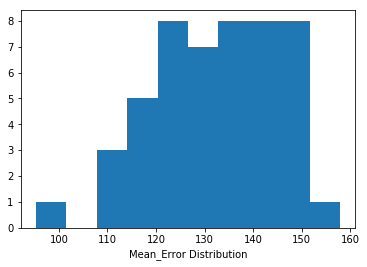

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(mean_error)
plt.xlabel("Mean_Error Distribution")
plt.show()

# PART B

In [24]:
#Repeating PART A with a Normalised Data

#normalising
X_norm = (X - X.mean()) / X.std()
n_cols = X_norm.shape[1] 

K = 50
mean_norm_error = np.zeros((K-1))

for n in range(1,K):
    X_train, X_test, y_train, y_test = train_test_split( X_norm, y, test_size=0.3)
    #Train Model and Predict  
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=2)
    yhat=model.predict(X_test)
    mean_norm_error[n-1] = mean_squared_error(y_test, yhat)

mean_norm_error

Train on 721 samples, validate on 309 samples
Epoch 1/50
 - 1s - loss: 1550.2715 - val_loss: 1402.7784
Epoch 2/50
 - 1s - loss: 1483.8559 - val_loss: 1345.3586
Epoch 3/50
 - 1s - loss: 1392.8694 - val_loss: 1205.7800
Epoch 4/50
 - 1s - loss: 1193.7294 - val_loss: 988.2853
Epoch 5/50
 - 0s - loss: 937.4945 - val_loss: 741.6983
Epoch 6/50
 - 1s - loss: 677.5990 - val_loss: 524.6518
Epoch 7/50
 - 0s - loss: 474.7953 - val_loss: 374.7801
Epoch 8/50
 - 1s - loss: 351.2157 - val_loss: 300.3430
Epoch 9/50
 - 1s - loss: 294.2302 - val_loss: 268.2224
Epoch 10/50
 - 0s - loss: 272.7144 - val_loss: 255.1122
Epoch 11/50
 - 1s - loss: 260.3244 - val_loss: 246.7082
Epoch 12/50
 - 0s - loss: 251.4005 - val_loss: 239.8794
Epoch 13/50
 - 1s - loss: 244.5088 - val_loss: 234.0313
Epoch 14/50
 - 0s - loss: 237.5574 - val_loss: 228.7002
Epoch 15/50
 - 1s - loss: 231.7939 - val_loss: 224.5117
Epoch 16/50
 - 1s - loss: 225.9803 - val_loss: 219.9745
Epoch 17/50
 - 1s - loss: 221.1503 - val_loss: 215.5871
Epoc

 - 1s - loss: 143.1226 - val_loss: 134.8469
Epoch 46/50
 - 1s - loss: 143.0624 - val_loss: 134.7317
Epoch 47/50
 - 0s - loss: 142.8295 - val_loss: 134.7479
Epoch 48/50
 - 0s - loss: 142.9311 - val_loss: 134.8826
Epoch 49/50
 - 1s - loss: 142.6811 - val_loss: 134.5180
Epoch 50/50
 - 1s - loss: 142.5693 - val_loss: 134.3924
Train on 721 samples, validate on 309 samples
Epoch 1/50
 - 0s - loss: 135.6219 - val_loss: 150.6686
Epoch 2/50
 - 1s - loss: 135.5968 - val_loss: 151.5826
Epoch 3/50
 - 1s - loss: 134.9481 - val_loss: 151.9888
Epoch 4/50
 - 1s - loss: 134.7425 - val_loss: 151.4127
Epoch 5/50
 - 0s - loss: 134.4780 - val_loss: 152.3009
Epoch 6/50
 - 1s - loss: 134.3077 - val_loss: 152.4292
Epoch 7/50
 - 1s - loss: 134.0723 - val_loss: 152.4503
Epoch 8/50
 - 1s - loss: 133.9519 - val_loss: 152.5748
Epoch 9/50
 - 0s - loss: 133.7358 - val_loss: 152.1992
Epoch 10/50
 - 1s - loss: 133.6651 - val_loss: 152.2065
Epoch 11/50
 - 0s - loss: 133.4831 - val_loss: 152.4526
Epoch 12/50
 - 1s - los

Epoch 40/50
 - 1s - loss: 132.9633 - val_loss: 121.9138
Epoch 41/50
 - 1s - loss: 132.8855 - val_loss: 121.4803
Epoch 42/50
 - 0s - loss: 132.8048 - val_loss: 121.6029
Epoch 43/50
 - 0s - loss: 133.4980 - val_loss: 122.4921
Epoch 44/50
 - 1s - loss: 132.6481 - val_loss: 121.6717
Epoch 45/50
 - 0s - loss: 132.7983 - val_loss: 120.6639
Epoch 46/50
 - 0s - loss: 132.9874 - val_loss: 122.3387
Epoch 47/50
 - 1s - loss: 132.4085 - val_loss: 121.9992
Epoch 48/50
 - 1s - loss: 132.5471 - val_loss: 121.9610
Epoch 49/50
 - 0s - loss: 132.3748 - val_loss: 121.4118
Epoch 50/50
 - 1s - loss: 132.5006 - val_loss: 121.6375
Train on 721 samples, validate on 309 samples
Epoch 1/50
 - 1s - loss: 128.4237 - val_loss: 129.8736
Epoch 2/50
 - 1s - loss: 127.9092 - val_loss: 130.9648
Epoch 3/50
 - 1s - loss: 127.3958 - val_loss: 131.7248
Epoch 4/50
 - 1s - loss: 127.1542 - val_loss: 132.0021
Epoch 5/50
 - 0s - loss: 127.2293 - val_loss: 132.3216
Epoch 6/50
 - 1s - loss: 126.7396 - val_loss: 132.9478
Epoch 7/

Epoch 35/50
 - 0s - loss: 118.8125 - val_loss: 133.8939
Epoch 36/50
 - 1s - loss: 118.6258 - val_loss: 133.9733
Epoch 37/50
 - 1s - loss: 119.2446 - val_loss: 134.3434
Epoch 38/50
 - 1s - loss: 118.4923 - val_loss: 134.0917
Epoch 39/50
 - 0s - loss: 118.5122 - val_loss: 134.5777
Epoch 40/50
 - 1s - loss: 118.4222 - val_loss: 134.0726
Epoch 41/50
 - 0s - loss: 118.5758 - val_loss: 134.3945
Epoch 42/50
 - 0s - loss: 118.3924 - val_loss: 134.4161
Epoch 43/50
 - 0s - loss: 118.4673 - val_loss: 134.2315
Epoch 44/50
 - 1s - loss: 118.2944 - val_loss: 134.0136
Epoch 45/50
 - 1s - loss: 118.0724 - val_loss: 133.9850
Epoch 46/50
 - 1s - loss: 118.4149 - val_loss: 134.0006
Epoch 47/50
 - 1s - loss: 118.6853 - val_loss: 134.3532
Epoch 48/50
 - 0s - loss: 118.1857 - val_loss: 134.0754
Epoch 49/50
 - 0s - loss: 117.9642 - val_loss: 134.3737
Epoch 50/50
 - 1s - loss: 118.2247 - val_loss: 134.4292
Train on 721 samples, validate on 309 samples
Epoch 1/50
 - 1s - loss: 116.3357 - val_loss: 140.2942
Epo

Epoch 30/50
 - 1s - loss: 117.8874 - val_loss: 125.6875
Epoch 31/50
 - 1s - loss: 118.0090 - val_loss: 125.6608
Epoch 32/50
 - 0s - loss: 117.8188 - val_loss: 125.7248
Epoch 33/50
 - 1s - loss: 117.8533 - val_loss: 125.4896
Epoch 34/50
 - 1s - loss: 117.8286 - val_loss: 125.9673
Epoch 35/50
 - 0s - loss: 117.7527 - val_loss: 125.7413
Epoch 36/50
 - 0s - loss: 118.2133 - val_loss: 126.0772
Epoch 37/50
 - 1s - loss: 117.6742 - val_loss: 125.7254
Epoch 38/50
 - 1s - loss: 117.6146 - val_loss: 125.6005
Epoch 39/50
 - 0s - loss: 118.0196 - val_loss: 126.1867
Epoch 40/50
 - 0s - loss: 117.4650 - val_loss: 126.0719
Epoch 41/50
 - 0s - loss: 117.5240 - val_loss: 126.0440
Epoch 42/50
 - 1s - loss: 117.3717 - val_loss: 126.4233
Epoch 43/50
 - 1s - loss: 117.8184 - val_loss: 126.1822
Epoch 44/50
 - 1s - loss: 117.5342 - val_loss: 126.5604
Epoch 45/50
 - 2s - loss: 117.2408 - val_loss: 126.4371
Epoch 46/50
 - 1s - loss: 117.3083 - val_loss: 125.9164
Epoch 47/50
 - 1s - loss: 117.2733 - val_loss: 1

Epoch 25/50
 - 0s - loss: 115.7861 - val_loss: 124.0254
Epoch 26/50
 - 0s - loss: 116.0806 - val_loss: 124.2264
Epoch 27/50
 - 1s - loss: 116.3457 - val_loss: 123.6702
Epoch 28/50
 - 1s - loss: 115.3696 - val_loss: 124.6269
Epoch 29/50
 - 0s - loss: 115.5849 - val_loss: 124.6035
Epoch 30/50
 - 0s - loss: 115.5135 - val_loss: 124.7476
Epoch 31/50
 - 1s - loss: 115.4391 - val_loss: 124.6962
Epoch 32/50
 - 1s - loss: 116.0479 - val_loss: 123.8986
Epoch 33/50
 - 1s - loss: 115.1339 - val_loss: 125.0627
Epoch 34/50
 - 0s - loss: 115.5393 - val_loss: 125.1583
Epoch 35/50
 - 1s - loss: 115.2793 - val_loss: 125.0581
Epoch 36/50
 - 1s - loss: 115.0670 - val_loss: 125.2319
Epoch 37/50
 - 0s - loss: 115.1388 - val_loss: 125.2725
Epoch 38/50
 - 0s - loss: 115.2660 - val_loss: 125.7885
Epoch 39/50
 - 0s - loss: 115.4253 - val_loss: 125.4476
Epoch 40/50
 - 1s - loss: 114.9939 - val_loss: 125.8789
Epoch 41/50
 - 1s - loss: 115.0139 - val_loss: 126.1254
Epoch 42/50
 - 1s - loss: 114.9348 - val_loss: 1

Epoch 20/50
 - 1s - loss: 121.0308 - val_loss: 106.2125
Epoch 21/50
 - 0s - loss: 120.4915 - val_loss: 106.1526
Epoch 22/50
 - 1s - loss: 120.3235 - val_loss: 106.5112
Epoch 23/50
 - 1s - loss: 120.4666 - val_loss: 106.4001
Epoch 24/50
 - 0s - loss: 120.1584 - val_loss: 106.8762
Epoch 25/50
 - 1s - loss: 120.4749 - val_loss: 107.5526
Epoch 26/50
 - 1s - loss: 120.3460 - val_loss: 106.6932
Epoch 27/50
 - 1s - loss: 120.1103 - val_loss: 107.2626
Epoch 28/50
 - 1s - loss: 120.0795 - val_loss: 106.7510
Epoch 29/50
 - 0s - loss: 120.0124 - val_loss: 107.1947
Epoch 30/50
 - 1s - loss: 120.1441 - val_loss: 106.7264
Epoch 31/50
 - 1s - loss: 120.2932 - val_loss: 107.6323
Epoch 32/50
 - 1s - loss: 119.9480 - val_loss: 107.0678
Epoch 33/50
 - 1s - loss: 119.8131 - val_loss: 106.9269
Epoch 34/50
 - 1s - loss: 119.9802 - val_loss: 107.7067
Epoch 35/50
 - 1s - loss: 119.9128 - val_loss: 107.9316
Epoch 36/50
 - 1s - loss: 119.9063 - val_loss: 107.4375
Epoch 37/50
 - 1s - loss: 120.0195 - val_loss: 1

Epoch 15/50
 - 1s - loss: 111.0871 - val_loss: 122.8635
Epoch 16/50
 - 0s - loss: 111.3140 - val_loss: 122.6524
Epoch 17/50
 - 0s - loss: 110.9756 - val_loss: 122.8352
Epoch 18/50
 - 1s - loss: 111.3981 - val_loss: 123.6344
Epoch 19/50
 - 1s - loss: 110.9001 - val_loss: 122.9546
Epoch 20/50
 - 0s - loss: 111.0924 - val_loss: 123.7499
Epoch 21/50
 - 1s - loss: 110.8286 - val_loss: 123.3079
Epoch 22/50
 - 1s - loss: 110.8100 - val_loss: 123.5838
Epoch 23/50
 - 1s - loss: 110.7387 - val_loss: 123.4806
Epoch 24/50
 - 0s - loss: 110.8191 - val_loss: 124.0812
Epoch 25/50
 - 1s - loss: 110.8472 - val_loss: 124.1539
Epoch 26/50
 - 1s - loss: 110.7072 - val_loss: 124.0937
Epoch 27/50
 - 0s - loss: 110.5683 - val_loss: 124.2310
Epoch 28/50
 - 1s - loss: 110.7052 - val_loss: 123.6449
Epoch 29/50
 - 1s - loss: 110.4917 - val_loss: 124.4064
Epoch 30/50
 - 1s - loss: 110.5564 - val_loss: 124.2187
Epoch 31/50
 - 1s - loss: 110.4337 - val_loss: 124.2414
Epoch 32/50
 - 1s - loss: 110.6758 - val_loss: 1

Epoch 10/50
 - 1s - loss: 116.0765 - val_loss: 110.4952
Epoch 11/50
 - 1s - loss: 116.0595 - val_loss: 109.4000
Epoch 12/50
 - 1s - loss: 115.6674 - val_loss: 109.6789
Epoch 13/50
 - 0s - loss: 115.5212 - val_loss: 109.7368
Epoch 14/50
 - 1s - loss: 115.6993 - val_loss: 111.3272
Epoch 15/50
 - 1s - loss: 115.5581 - val_loss: 110.0170
Epoch 16/50
 - 1s - loss: 115.3076 - val_loss: 110.6985
Epoch 17/50
 - 1s - loss: 115.6146 - val_loss: 110.3774
Epoch 18/50
 - 0s - loss: 115.6066 - val_loss: 110.3930
Epoch 19/50
 - 1s - loss: 115.2553 - val_loss: 111.7346
Epoch 20/50
 - 0s - loss: 115.0816 - val_loss: 110.9025
Epoch 21/50
 - 1s - loss: 115.1660 - val_loss: 110.6880
Epoch 22/50
 - 1s - loss: 114.7426 - val_loss: 111.4844
Epoch 23/50
 - 1s - loss: 115.1293 - val_loss: 111.8869
Epoch 24/50
 - 1s - loss: 114.9006 - val_loss: 110.6526
Epoch 25/50
 - 0s - loss: 115.4768 - val_loss: 111.7670
Epoch 26/50
 - 0s - loss: 114.9556 - val_loss: 111.9612
Epoch 27/50
 - 1s - loss: 115.1743 - val_loss: 1

Epoch 5/50
 - 0s - loss: 113.6329 - val_loss: 112.8523
Epoch 6/50
 - 1s - loss: 113.5389 - val_loss: 113.5439
Epoch 7/50
 - 0s - loss: 113.0613 - val_loss: 113.5018
Epoch 8/50
 - 1s - loss: 113.0176 - val_loss: 113.7223
Epoch 9/50
 - 1s - loss: 112.9906 - val_loss: 113.9402
Epoch 10/50
 - 1s - loss: 112.5918 - val_loss: 114.6579
Epoch 11/50
 - 0s - loss: 113.3287 - val_loss: 114.3194
Epoch 12/50
 - 1s - loss: 112.9980 - val_loss: 114.8936
Epoch 13/50
 - 1s - loss: 112.2117 - val_loss: 114.9809
Epoch 14/50
 - 0s - loss: 112.6667 - val_loss: 115.3022
Epoch 15/50
 - 1s - loss: 112.1898 - val_loss: 115.5363
Epoch 16/50
 - 1s - loss: 112.1217 - val_loss: 116.0088
Epoch 17/50
 - 1s - loss: 111.8042 - val_loss: 115.4449
Epoch 18/50
 - 1s - loss: 112.1092 - val_loss: 115.9091
Epoch 19/50
 - 1s - loss: 111.6584 - val_loss: 115.9782
Epoch 20/50
 - 1s - loss: 111.7910 - val_loss: 115.9906
Epoch 21/50
 - 1s - loss: 112.0197 - val_loss: 116.6065
Epoch 22/50
 - 0s - loss: 111.3521 - val_loss: 116.85

 - 1s - loss: 104.9765 - val_loss: 131.0398
Train on 721 samples, validate on 309 samples
Epoch 1/50
 - 1s - loss: 112.0833 - val_loss: 114.7461
Epoch 2/50
 - 1s - loss: 112.1675 - val_loss: 115.2902
Epoch 3/50
 - 1s - loss: 111.4327 - val_loss: 115.4195
Epoch 4/50
 - 0s - loss: 110.9569 - val_loss: 116.4135
Epoch 5/50
 - 1s - loss: 110.7851 - val_loss: 116.4413
Epoch 6/50
 - 1s - loss: 110.7526 - val_loss: 116.7611
Epoch 7/50
 - 1s - loss: 110.4204 - val_loss: 116.8099
Epoch 8/50
 - 0s - loss: 110.0885 - val_loss: 117.3190
Epoch 9/50
 - 0s - loss: 110.4732 - val_loss: 118.0759
Epoch 10/50
 - 0s - loss: 110.2813 - val_loss: 117.9287
Epoch 11/50
 - 1s - loss: 110.3046 - val_loss: 117.9996
Epoch 12/50
 - 0s - loss: 110.1121 - val_loss: 117.9674
Epoch 13/50
 - 1s - loss: 110.1872 - val_loss: 118.9260
Epoch 14/50
 - 0s - loss: 109.6437 - val_loss: 118.3537
Epoch 15/50
 - 1s - loss: 109.4894 - val_loss: 118.6516
Epoch 16/50
 - 0s - loss: 109.6704 - val_loss: 118.6932
Epoch 17/50
 - 0s - los

Epoch 45/50
 - 0s - loss: 106.5613 - val_loss: 123.8340
Epoch 46/50
 - 0s - loss: 106.2847 - val_loss: 123.6894
Epoch 47/50
 - 1s - loss: 106.6629 - val_loss: 124.1696
Epoch 48/50
 - 0s - loss: 106.2062 - val_loss: 123.9013
Epoch 49/50
 - 1s - loss: 106.5573 - val_loss: 124.4537
Epoch 50/50
 - 0s - loss: 106.6047 - val_loss: 123.9739
Train on 721 samples, validate on 309 samples
Epoch 1/50
 - 0s - loss: 118.3359 - val_loss: 97.3641
Epoch 2/50
 - 0s - loss: 118.2746 - val_loss: 97.8553
Epoch 3/50
 - 0s - loss: 117.5803 - val_loss: 98.0289
Epoch 4/50
 - 0s - loss: 117.1398 - val_loss: 98.4863
Epoch 5/50
 - 1s - loss: 117.6404 - val_loss: 99.4415
Epoch 6/50
 - 0s - loss: 116.9335 - val_loss: 99.6259
Epoch 7/50
 - 0s - loss: 117.1560 - val_loss: 100.2549
Epoch 8/50
 - 0s - loss: 116.9286 - val_loss: 100.5694
Epoch 9/50
 - 1s - loss: 116.8517 - val_loss: 99.9731
Epoch 10/50
 - 1s - loss: 116.3832 - val_loss: 100.9970
Epoch 11/50
 - 0s - loss: 116.7323 - val_loss: 100.8783
Epoch 12/50
 - 1s 

Epoch 40/50
 - 0s - loss: 104.6733 - val_loss: 128.3810
Epoch 41/50
 - 1s - loss: 104.9301 - val_loss: 128.3459
Epoch 42/50
 - 0s - loss: 105.2642 - val_loss: 128.6258
Epoch 43/50
 - 1s - loss: 104.7190 - val_loss: 128.7332
Epoch 44/50
 - 1s - loss: 104.9896 - val_loss: 128.3367
Epoch 45/50
 - 1s - loss: 104.5555 - val_loss: 128.2138
Epoch 46/50
 - 0s - loss: 104.4165 - val_loss: 128.6419
Epoch 47/50
 - 1s - loss: 104.5390 - val_loss: 128.7897
Epoch 48/50
 - 1s - loss: 104.7091 - val_loss: 128.7215
Epoch 49/50
 - 0s - loss: 104.4333 - val_loss: 128.8053
Epoch 50/50
 - 0s - loss: 104.7596 - val_loss: 129.2139
Train on 721 samples, validate on 309 samples
Epoch 1/50
 - 0s - loss: 115.5837 - val_loss: 104.2835
Epoch 2/50
 - 1s - loss: 114.7332 - val_loss: 104.6099
Epoch 3/50
 - 1s - loss: 113.9367 - val_loss: 106.1568
Epoch 4/50
 - 1s - loss: 113.9559 - val_loss: 105.9597
Epoch 5/50
 - 1s - loss: 113.7132 - val_loss: 105.9685
Epoch 6/50
 - 0s - loss: 113.7262 - val_loss: 106.5292
Epoch 7/

Epoch 35/50
 - 0s - loss: 110.2586 - val_loss: 111.7902
Epoch 36/50
 - 1s - loss: 110.2113 - val_loss: 112.4304
Epoch 37/50
 - 0s - loss: 110.2514 - val_loss: 111.8684
Epoch 38/50
 - 1s - loss: 110.5716 - val_loss: 111.7601
Epoch 39/50
 - 1s - loss: 110.0604 - val_loss: 112.5479
Epoch 40/50
 - 1s - loss: 110.0663 - val_loss: 112.5953
Epoch 41/50
 - 1s - loss: 109.9785 - val_loss: 112.5083
Epoch 42/50
 - 0s - loss: 110.2955 - val_loss: 112.2265
Epoch 43/50
 - 0s - loss: 109.8306 - val_loss: 112.2992
Epoch 44/50
 - 0s - loss: 110.1388 - val_loss: 112.2210
Epoch 45/50
 - 1s - loss: 110.1174 - val_loss: 111.9489
Epoch 46/50
 - 0s - loss: 110.2815 - val_loss: 113.0247
Epoch 47/50
 - 1s - loss: 110.5858 - val_loss: 113.1586
Epoch 48/50
 - 1s - loss: 109.8066 - val_loss: 112.0585
Epoch 49/50
 - 1s - loss: 109.9546 - val_loss: 112.6199
Epoch 50/50
 - 1s - loss: 109.9143 - val_loss: 113.2213
Train on 721 samples, validate on 309 samples
Epoch 1/50
 - 1s - loss: 111.2786 - val_loss: 110.8437
Epo

Epoch 30/50
 - 1s - loss: 108.9154 - val_loss: 115.1991
Epoch 31/50
 - 1s - loss: 109.1328 - val_loss: 115.6747
Epoch 32/50
 - 0s - loss: 108.9378 - val_loss: 116.2399
Epoch 33/50
 - 1s - loss: 108.7251 - val_loss: 114.9433
Epoch 34/50
 - 0s - loss: 109.3746 - val_loss: 115.3818
Epoch 35/50
 - 1s - loss: 108.8257 - val_loss: 115.1022
Epoch 36/50
 - 1s - loss: 109.0994 - val_loss: 115.0837
Epoch 37/50
 - 1s - loss: 109.1445 - val_loss: 116.2190
Epoch 38/50
 - 0s - loss: 108.6577 - val_loss: 115.1817
Epoch 39/50
 - 1s - loss: 108.7205 - val_loss: 115.2870
Epoch 40/50
 - 1s - loss: 108.7093 - val_loss: 115.9109
Epoch 41/50
 - 1s - loss: 109.0450 - val_loss: 116.5465
Epoch 42/50
 - 0s - loss: 108.6969 - val_loss: 116.5143
Epoch 43/50
 - 1s - loss: 109.1583 - val_loss: 115.8256
Epoch 44/50
 - 1s - loss: 108.9380 - val_loss: 116.2708
Epoch 45/50
 - 1s - loss: 108.6844 - val_loss: 116.6566
Epoch 46/50
 - 1s - loss: 108.6886 - val_loss: 116.5240
Epoch 47/50
 - 1s - loss: 108.5068 - val_loss: 1

Epoch 25/50
 - 1s - loss: 101.8380 - val_loss: 131.7022
Epoch 26/50
 - 0s - loss: 101.4488 - val_loss: 132.1013
Epoch 27/50
 - 1s - loss: 101.5904 - val_loss: 132.2311
Epoch 28/50
 - 1s - loss: 101.4658 - val_loss: 132.4840
Epoch 29/50
 - 0s - loss: 101.4227 - val_loss: 132.5991
Epoch 30/50
 - 1s - loss: 101.5107 - val_loss: 132.9027
Epoch 31/50
 - 0s - loss: 101.3190 - val_loss: 133.1618
Epoch 32/50
 - 0s - loss: 101.2711 - val_loss: 133.4922
Epoch 33/50
 - 1s - loss: 101.4399 - val_loss: 132.8826
Epoch 34/50
 - 1s - loss: 101.1742 - val_loss: 133.6820
Epoch 35/50
 - 1s - loss: 101.1884 - val_loss: 133.7991
Epoch 36/50
 - 1s - loss: 101.3177 - val_loss: 133.6078
Epoch 37/50
 - 0s - loss: 101.3508 - val_loss: 133.9254
Epoch 38/50
 - 1s - loss: 101.0596 - val_loss: 134.0746
Epoch 39/50
 - 1s - loss: 101.2596 - val_loss: 134.4169
Epoch 40/50
 - 1s - loss: 101.5347 - val_loss: 134.0662
Epoch 41/50
 - 1s - loss: 101.0388 - val_loss: 134.0694
Epoch 42/50
 - 1s - loss: 101.1684 - val_loss: 1

Epoch 20/50
 - 1s - loss: 108.2205 - val_loss: 113.6447
Epoch 21/50
 - 1s - loss: 107.7512 - val_loss: 113.3439
Epoch 22/50
 - 0s - loss: 107.5669 - val_loss: 113.4827
Epoch 23/50
 - 1s - loss: 107.7153 - val_loss: 114.1387
Epoch 24/50
 - 1s - loss: 107.5073 - val_loss: 113.9301
Epoch 25/50
 - 0s - loss: 107.4667 - val_loss: 113.9953
Epoch 26/50
 - 1s - loss: 107.4283 - val_loss: 114.3391
Epoch 27/50
 - 0s - loss: 107.2842 - val_loss: 115.1283
Epoch 28/50
 - 1s - loss: 107.5252 - val_loss: 114.6029
Epoch 29/50
 - 1s - loss: 107.3694 - val_loss: 115.3571
Epoch 30/50
 - 1s - loss: 107.3028 - val_loss: 115.0182
Epoch 31/50
 - 0s - loss: 107.5278 - val_loss: 114.7757
Epoch 32/50
 - 0s - loss: 107.1973 - val_loss: 116.4509
Epoch 33/50
 - 0s - loss: 106.8656 - val_loss: 114.8644
Epoch 34/50
 - 0s - loss: 107.0810 - val_loss: 115.5651
Epoch 35/50
 - 1s - loss: 107.1493 - val_loss: 116.0472
Epoch 36/50
 - 0s - loss: 106.7984 - val_loss: 115.1388
Epoch 37/50
 - 1s - loss: 107.2898 - val_loss: 1

array([174.58617604, 158.78571879, 134.39236566, 151.39321641,
       124.20729938, 121.6375328 , 134.76021898, 126.41846047,
       134.4291808 , 144.93588558, 123.55892173, 126.51719586,
       117.23579897, 141.09253032, 126.64466487, 126.73669398,
       137.23119017, 108.99793246, 123.98043934, 116.60667911,
       125.32422527, 117.0219648 , 123.82778341, 113.29336309,
       117.52121397, 133.16900793, 120.27898574, 119.18587828,
       131.03977123, 121.9308247 , 129.74514637, 123.973866  ,
       105.96343974, 116.00191453, 129.21388213, 112.09275234,
       124.64707829, 113.22130335, 120.42461078, 130.96488721,
       116.19752916, 133.66752873, 108.71848467, 135.51029817,
       130.22719782, 115.91205885, 117.41898621, 114.78701239,
       117.26770856])

In [25]:
print('Mean of Mean Squared Errors with Normalization is ',mean_norm_error.mean())
print('Standard deviation of Mean Squared Errors with Normalization is ',mean_norm_error.std())

Mean of Mean Squared Errors with Normalization is  125.97340419166353
Standard deviation of Mean Squared Errors with Normalization is  12.67638552938248


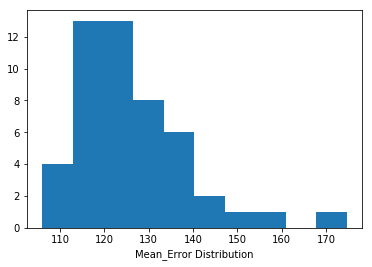

In [26]:
plt.hist(mean_norm_error)
plt.xlabel("Mean_Error Distribution")
plt.show()

Discussion: In this part, we have normalized the input data and the following changes can be noted. The mean of mean square error has come down from 132.13495 to 125.9734 and its Standard Deviation is almost the same, which is 12.676. By checking the distribution we can see that the mean squared error has shifted to the right. So we can conclude that normalising the input data improved out model.

# PART C

In [27]:
#Repeat Part B with 100 Epochs
K = 50
mean_norm_100_error = np.zeros((K-1))

for n in range(1,K):
    X_train, X_test, y_train, y_test = train_test_split( X_norm, y, test_size=0.3)
    #Train Model and Predict  
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=2)
    yhat=model.predict(X_test)
    mean_norm_100_error[n-1] = mean_squared_error(y_test, yhat)

mean_norm_100_error

Train on 721 samples, validate on 309 samples
Epoch 1/100
 - 0s - loss: 107.8766 - val_loss: 113.4457
Epoch 2/100
 - 0s - loss: 107.7473 - val_loss: 113.9554
Epoch 3/100
 - 0s - loss: 107.4975 - val_loss: 114.1585
Epoch 4/100
 - 0s - loss: 106.9945 - val_loss: 114.2301
Epoch 5/100
 - 1s - loss: 107.2759 - val_loss: 114.5032
Epoch 6/100
 - 0s - loss: 106.7928 - val_loss: 115.7288
Epoch 7/100
 - 1s - loss: 106.6567 - val_loss: 115.9395
Epoch 8/100
 - 1s - loss: 106.4120 - val_loss: 115.3794
Epoch 9/100
 - 0s - loss: 106.4090 - val_loss: 116.2886
Epoch 10/100
 - 0s - loss: 106.0902 - val_loss: 116.3010
Epoch 11/100
 - 1s - loss: 106.5378 - val_loss: 116.7928
Epoch 12/100
 - 0s - loss: 105.9361 - val_loss: 116.8459
Epoch 13/100
 - 1s - loss: 106.1612 - val_loss: 116.6290
Epoch 14/100
 - 1s - loss: 106.2732 - val_loss: 117.0404
Epoch 15/100
 - 0s - loss: 105.8535 - val_loss: 117.8244
Epoch 16/100
 - 1s - loss: 105.6105 - val_loss: 117.4590
Epoch 17/100
 - 0s - loss: 106.0053 - val_loss: 117

Epoch 44/100
 - 0s - loss: 103.9678 - val_loss: 123.0103
Epoch 45/100
 - 0s - loss: 103.5868 - val_loss: 122.1325
Epoch 46/100
 - 1s - loss: 103.6568 - val_loss: 122.3490
Epoch 47/100
 - 1s - loss: 103.9888 - val_loss: 121.6579
Epoch 48/100
 - 1s - loss: 103.4427 - val_loss: 123.1832
Epoch 49/100
 - 1s - loss: 103.5745 - val_loss: 123.0311
Epoch 50/100
 - 1s - loss: 103.3452 - val_loss: 123.7485
Epoch 51/100
 - 1s - loss: 103.7249 - val_loss: 123.2500
Epoch 52/100
 - 1s - loss: 103.5560 - val_loss: 123.2651
Epoch 53/100
 - 1s - loss: 103.6793 - val_loss: 124.1351
Epoch 54/100
 - 1s - loss: 103.4740 - val_loss: 122.9882
Epoch 55/100
 - 1s - loss: 103.4211 - val_loss: 124.3545
Epoch 56/100
 - 0s - loss: 103.5718 - val_loss: 124.2597
Epoch 57/100
 - 0s - loss: 103.6946 - val_loss: 123.5888
Epoch 58/100
 - 0s - loss: 103.6731 - val_loss: 123.6020
Epoch 59/100
 - 1s - loss: 103.2765 - val_loss: 123.0972
Epoch 60/100
 - 0s - loss: 103.2216 - val_loss: 124.0497
Epoch 61/100
 - 0s - loss: 103.

 - 0s - loss: 103.4107 - val_loss: 124.5938
Epoch 88/100
 - 1s - loss: 103.4982 - val_loss: 125.0458
Epoch 89/100
 - 1s - loss: 103.1656 - val_loss: 124.9261
Epoch 90/100
 - 0s - loss: 102.9872 - val_loss: 124.9965
Epoch 91/100
 - 0s - loss: 103.1226 - val_loss: 124.9763
Epoch 92/100
 - 1s - loss: 103.0992 - val_loss: 125.5216
Epoch 93/100
 - 0s - loss: 103.0733 - val_loss: 125.7950
Epoch 94/100
 - 0s - loss: 102.9599 - val_loss: 125.2148
Epoch 95/100
 - 0s - loss: 103.8718 - val_loss: 125.4433
Epoch 96/100
 - 1s - loss: 103.3295 - val_loss: 125.3663
Epoch 97/100
 - 1s - loss: 103.5495 - val_loss: 125.4546
Epoch 98/100
 - 0s - loss: 103.2678 - val_loss: 125.5360
Epoch 99/100
 - 1s - loss: 103.2675 - val_loss: 125.4383
Epoch 100/100
 - 0s - loss: 103.9639 - val_loss: 126.3663
Train on 721 samples, validate on 309 samples
Epoch 1/100
 - 1s - loss: 106.0320 - val_loss: 119.6450
Epoch 2/100
 - 0s - loss: 105.3350 - val_loss: 121.5834
Epoch 3/100
 - 1s - loss: 104.8526 - val_loss: 122.0959


Epoch 30/100
 - 1s - loss: 100.6190 - val_loss: 127.3484
Epoch 31/100
 - 1s - loss: 100.8909 - val_loss: 127.0126
Epoch 32/100
 - 0s - loss: 100.7367 - val_loss: 128.4708
Epoch 33/100
 - 0s - loss: 100.8001 - val_loss: 127.7298
Epoch 34/100
 - 1s - loss: 100.5023 - val_loss: 127.9917
Epoch 35/100
 - 0s - loss: 100.3357 - val_loss: 128.0682
Epoch 36/100
 - 1s - loss: 100.6399 - val_loss: 127.7827
Epoch 37/100
 - 1s - loss: 100.4850 - val_loss: 128.5084
Epoch 38/100
 - 1s - loss: 100.4153 - val_loss: 128.5645
Epoch 39/100
 - 1s - loss: 100.4494 - val_loss: 128.2231
Epoch 40/100
 - 0s - loss: 100.4528 - val_loss: 127.7026
Epoch 41/100
 - 1s - loss: 100.3996 - val_loss: 128.6246
Epoch 42/100
 - 0s - loss: 100.3897 - val_loss: 128.7093
Epoch 43/100
 - 1s - loss: 100.8995 - val_loss: 127.6627
Epoch 44/100
 - 1s - loss: 100.1099 - val_loss: 129.3517
Epoch 45/100
 - 0s - loss: 100.4754 - val_loss: 129.2097
Epoch 46/100
 - 0s - loss: 100.1430 - val_loss: 129.0642
Epoch 47/100
 - 1s - loss: 100.

Epoch 74/100
 - 1s - loss: 105.6349 - val_loss: 115.4258
Epoch 75/100
 - 0s - loss: 105.8364 - val_loss: 114.7839
Epoch 76/100
 - 0s - loss: 105.6072 - val_loss: 114.8804
Epoch 77/100
 - 0s - loss: 105.4219 - val_loss: 115.3268
Epoch 78/100
 - 1s - loss: 105.5995 - val_loss: 115.6547
Epoch 79/100
 - 1s - loss: 105.5609 - val_loss: 115.5246
Epoch 80/100
 - 1s - loss: 105.3782 - val_loss: 114.8392
Epoch 81/100
 - 1s - loss: 105.4725 - val_loss: 115.6518
Epoch 82/100
 - 0s - loss: 105.7750 - val_loss: 115.3530
Epoch 83/100
 - 1s - loss: 105.3881 - val_loss: 115.8158
Epoch 84/100
 - 0s - loss: 105.9714 - val_loss: 115.2212
Epoch 85/100
 - 1s - loss: 105.5615 - val_loss: 116.1178
Epoch 86/100
 - 0s - loss: 105.3953 - val_loss: 115.9409
Epoch 87/100
 - 1s - loss: 105.8140 - val_loss: 115.9920
Epoch 88/100
 - 1s - loss: 105.4124 - val_loss: 115.7387
Epoch 89/100
 - 1s - loss: 105.6824 - val_loss: 116.2502
Epoch 90/100
 - 0s - loss: 105.7436 - val_loss: 115.8777
Epoch 91/100
 - 1s - loss: 105.

Epoch 17/100
 - 0s - loss: 102.2078 - val_loss: 120.1065
Epoch 18/100
 - 1s - loss: 102.2043 - val_loss: 120.7807
Epoch 19/100
 - 1s - loss: 101.8800 - val_loss: 121.2703
Epoch 20/100
 - 1s - loss: 101.9478 - val_loss: 120.9407
Epoch 21/100
 - 1s - loss: 101.7683 - val_loss: 121.4838
Epoch 22/100
 - 1s - loss: 101.7842 - val_loss: 120.9922
Epoch 23/100
 - 0s - loss: 101.7894 - val_loss: 121.3101
Epoch 24/100
 - 1s - loss: 101.7541 - val_loss: 121.4705
Epoch 25/100
 - 1s - loss: 101.6319 - val_loss: 121.7815
Epoch 26/100
 - 0s - loss: 101.5223 - val_loss: 122.3505
Epoch 27/100
 - 0s - loss: 101.5956 - val_loss: 121.2608
Epoch 28/100
 - 1s - loss: 101.6650 - val_loss: 122.6157
Epoch 29/100
 - 1s - loss: 101.3767 - val_loss: 122.8743
Epoch 30/100
 - 0s - loss: 101.4620 - val_loss: 123.1841
Epoch 31/100
 - 0s - loss: 101.9389 - val_loss: 123.0159
Epoch 32/100
 - 0s - loss: 101.3486 - val_loss: 122.5532
Epoch 33/100
 - 1s - loss: 101.4438 - val_loss: 123.4667
Epoch 34/100
 - 1s - loss: 101.

 - 1s - loss: 105.5028 - val_loss: 114.6551
Epoch 61/100
 - 1s - loss: 105.3338 - val_loss: 113.5722
Epoch 62/100
 - 1s - loss: 105.4451 - val_loss: 114.3653
Epoch 63/100
 - 1s - loss: 105.4245 - val_loss: 114.6146
Epoch 64/100
 - 0s - loss: 105.3984 - val_loss: 114.1380
Epoch 65/100
 - 0s - loss: 105.0206 - val_loss: 114.2187
Epoch 66/100
 - 0s - loss: 105.3810 - val_loss: 114.9948
Epoch 67/100
 - 0s - loss: 105.7138 - val_loss: 115.2087
Epoch 68/100
 - 0s - loss: 105.2763 - val_loss: 115.0304
Epoch 69/100
 - 1s - loss: 105.3928 - val_loss: 113.9201
Epoch 70/100
 - 1s - loss: 105.4704 - val_loss: 116.2129
Epoch 71/100
 - 0s - loss: 105.5252 - val_loss: 113.8601
Epoch 72/100
 - 0s - loss: 105.0882 - val_loss: 114.6647
Epoch 73/100
 - 1s - loss: 105.3086 - val_loss: 114.9838
Epoch 74/100
 - 0s - loss: 105.2324 - val_loss: 114.5931
Epoch 75/100
 - 1s - loss: 105.1041 - val_loss: 115.0678
Epoch 76/100
 - 0s - loss: 105.2687 - val_loss: 114.7259
Epoch 77/100
 - 1s - loss: 105.1029 - val_lo

Epoch 4/100
 - 1s - loss: 107.6703 - val_loss: 109.3527
Epoch 5/100
 - 1s - loss: 107.1298 - val_loss: 110.4184
Epoch 6/100
 - 0s - loss: 107.0791 - val_loss: 111.7998
Epoch 7/100
 - 1s - loss: 106.6308 - val_loss: 111.9662
Epoch 8/100
 - 1s - loss: 106.9267 - val_loss: 113.0675
Epoch 9/100
 - 0s - loss: 106.4148 - val_loss: 113.2637
Epoch 10/100
 - 0s - loss: 105.9466 - val_loss: 113.3384
Epoch 11/100
 - 0s - loss: 105.4755 - val_loss: 114.6660
Epoch 12/100
 - 0s - loss: 105.3439 - val_loss: 115.1416
Epoch 13/100
 - 0s - loss: 105.2937 - val_loss: 114.2299
Epoch 14/100
 - 1s - loss: 104.9234 - val_loss: 115.6936
Epoch 15/100
 - 1s - loss: 105.0018 - val_loss: 116.9709
Epoch 16/100
 - 0s - loss: 104.8554 - val_loss: 115.6991
Epoch 17/100
 - 1s - loss: 105.1298 - val_loss: 116.8213
Epoch 18/100
 - 1s - loss: 104.8070 - val_loss: 116.5173
Epoch 19/100
 - 1s - loss: 104.9093 - val_loss: 117.4488
Epoch 20/100
 - 1s - loss: 104.1671 - val_loss: 118.4121
Epoch 21/100
 - 1s - loss: 104.3465 -

 - 1s - loss: 104.9309 - val_loss: 114.4065
Epoch 48/100
 - 1s - loss: 105.0170 - val_loss: 114.0957
Epoch 49/100
 - 1s - loss: 105.0200 - val_loss: 115.4495
Epoch 50/100
 - 1s - loss: 105.2459 - val_loss: 114.2463
Epoch 51/100
 - 0s - loss: 105.3245 - val_loss: 113.8390
Epoch 52/100
 - 0s - loss: 104.5397 - val_loss: 115.8993
Epoch 53/100
 - 1s - loss: 104.9600 - val_loss: 114.0367
Epoch 54/100
 - 1s - loss: 104.6259 - val_loss: 114.2710
Epoch 55/100
 - 0s - loss: 104.8117 - val_loss: 114.7293
Epoch 56/100
 - 1s - loss: 104.8768 - val_loss: 115.3303
Epoch 57/100
 - 1s - loss: 104.6868 - val_loss: 114.9054
Epoch 58/100
 - 0s - loss: 105.0025 - val_loss: 113.9524
Epoch 59/100
 - 1s - loss: 104.9564 - val_loss: 114.9291
Epoch 60/100
 - 1s - loss: 104.3714 - val_loss: 116.2543
Epoch 61/100
 - 0s - loss: 104.4772 - val_loss: 115.1452
Epoch 62/100
 - 0s - loss: 104.6834 - val_loss: 114.9242
Epoch 63/100
 - 1s - loss: 104.9283 - val_loss: 114.9462
Epoch 64/100
 - 1s - loss: 105.3795 - val_lo

Epoch 91/100
 - 0s - loss: 99.9911 - val_loss: 128.6340
Epoch 92/100
 - 0s - loss: 99.9128 - val_loss: 128.8805
Epoch 93/100
 - 0s - loss: 100.0648 - val_loss: 129.0072
Epoch 94/100
 - 0s - loss: 100.1021 - val_loss: 128.8923
Epoch 95/100
 - 0s - loss: 99.8972 - val_loss: 128.8535
Epoch 96/100
 - 0s - loss: 99.9985 - val_loss: 128.6682
Epoch 97/100
 - 1s - loss: 99.8554 - val_loss: 128.9685
Epoch 98/100
 - 0s - loss: 99.5112 - val_loss: 128.9396
Epoch 99/100
 - 1s - loss: 99.9797 - val_loss: 129.3535
Epoch 100/100
 - 1s - loss: 99.6894 - val_loss: 129.5776
Train on 721 samples, validate on 309 samples
Epoch 1/100
 - 0s - loss: 108.5891 - val_loss: 109.7964
Epoch 2/100
 - 0s - loss: 106.9292 - val_loss: 112.2239
Epoch 3/100
 - 1s - loss: 106.5037 - val_loss: 113.2794
Epoch 4/100
 - 1s - loss: 106.0126 - val_loss: 113.8259
Epoch 5/100
 - 1s - loss: 105.5687 - val_loss: 114.6106
Epoch 6/100
 - 0s - loss: 105.5006 - val_loss: 114.8539
Epoch 7/100
 - 1s - loss: 104.9090 - val_loss: 115.5717

 - 1s - loss: 99.6438 - val_loss: 125.7941
Epoch 35/100
 - 0s - loss: 99.6972 - val_loss: 125.9325
Epoch 36/100
 - 0s - loss: 99.4675 - val_loss: 125.8316
Epoch 37/100
 - 1s - loss: 99.0821 - val_loss: 126.3929
Epoch 38/100
 - 1s - loss: 99.2672 - val_loss: 126.3377
Epoch 39/100
 - 1s - loss: 99.1283 - val_loss: 126.4168
Epoch 40/100
 - 0s - loss: 98.8672 - val_loss: 126.7025
Epoch 41/100
 - 1s - loss: 99.1523 - val_loss: 126.8791
Epoch 42/100
 - 0s - loss: 99.6801 - val_loss: 127.1735
Epoch 43/100
 - 1s - loss: 99.4381 - val_loss: 127.0440
Epoch 44/100
 - 0s - loss: 99.2371 - val_loss: 126.9547
Epoch 45/100
 - 1s - loss: 99.1029 - val_loss: 127.2890
Epoch 46/100
 - 1s - loss: 99.2884 - val_loss: 127.8656
Epoch 47/100
 - 2s - loss: 98.7574 - val_loss: 127.5196
Epoch 48/100
 - 1s - loss: 98.5435 - val_loss: 127.5350
Epoch 49/100
 - 0s - loss: 98.9046 - val_loss: 127.9065
Epoch 50/100
 - 1s - loss: 98.9440 - val_loss: 127.4961
Epoch 51/100
 - 1s - loss: 98.6023 - val_loss: 128.2211
Epoch

Epoch 80/100
 - 0s - loss: 97.9424 - val_loss: 131.6631
Epoch 81/100
 - 0s - loss: 98.7824 - val_loss: 130.8777
Epoch 82/100
 - 0s - loss: 98.2344 - val_loss: 131.2890
Epoch 83/100
 - 0s - loss: 97.9899 - val_loss: 131.4735
Epoch 84/100
 - 0s - loss: 98.2909 - val_loss: 131.8304
Epoch 85/100
 - 0s - loss: 98.3998 - val_loss: 132.0176
Epoch 86/100
 - 0s - loss: 98.3684 - val_loss: 131.3768
Epoch 87/100
 - 0s - loss: 98.2565 - val_loss: 132.3060
Epoch 88/100
 - 1s - loss: 98.0464 - val_loss: 132.2603
Epoch 89/100
 - 1s - loss: 98.6247 - val_loss: 131.4026
Epoch 90/100
 - 1s - loss: 97.8411 - val_loss: 132.7794
Epoch 91/100
 - 0s - loss: 98.3803 - val_loss: 132.5240
Epoch 92/100
 - 1s - loss: 98.0677 - val_loss: 131.7005
Epoch 93/100
 - 0s - loss: 98.2129 - val_loss: 132.0721
Epoch 94/100
 - 0s - loss: 98.1259 - val_loss: 132.6714
Epoch 95/100
 - 0s - loss: 97.8543 - val_loss: 132.5248
Epoch 96/100
 - 1s - loss: 97.7766 - val_loss: 132.1903
Epoch 97/100
 - 1s - loss: 97.7225 - val_loss: 1

Epoch 25/100
 - 0s - loss: 101.6476 - val_loss: 120.6048
Epoch 26/100
 - 1s - loss: 101.5180 - val_loss: 120.9104
Epoch 27/100
 - 0s - loss: 101.4587 - val_loss: 119.6591
Epoch 28/100
 - 0s - loss: 101.5775 - val_loss: 120.2359
Epoch 29/100
 - 0s - loss: 101.8451 - val_loss: 121.1966
Epoch 30/100
 - 1s - loss: 101.2912 - val_loss: 120.3456
Epoch 31/100
 - 1s - loss: 101.2137 - val_loss: 120.9242
Epoch 32/100
 - 1s - loss: 101.3018 - val_loss: 121.8618
Epoch 33/100
 - 1s - loss: 102.0171 - val_loss: 120.2246
Epoch 34/100
 - 0s - loss: 101.5814 - val_loss: 121.0062
Epoch 35/100
 - 0s - loss: 101.0892 - val_loss: 119.9600
Epoch 36/100
 - 1s - loss: 100.9940 - val_loss: 121.5784
Epoch 37/100
 - 1s - loss: 101.1743 - val_loss: 121.6246
Epoch 38/100
 - 1s - loss: 101.2251 - val_loss: 119.6744
Epoch 39/100
 - 0s - loss: 101.2955 - val_loss: 120.3278
Epoch 40/100
 - 1s - loss: 101.1570 - val_loss: 121.7833
Epoch 41/100
 - 1s - loss: 101.0422 - val_loss: 120.9291
Epoch 42/100
 - 0s - loss: 101.

 - 1s - loss: 102.2552 - val_loss: 119.4514
Epoch 69/100
 - 1s - loss: 102.4823 - val_loss: 119.2319
Epoch 70/100
 - 1s - loss: 102.3537 - val_loss: 119.3001
Epoch 71/100
 - 1s - loss: 102.5127 - val_loss: 119.6565
Epoch 72/100
 - 1s - loss: 102.1412 - val_loss: 119.1755
Epoch 73/100
 - 1s - loss: 102.3156 - val_loss: 119.7952
Epoch 74/100
 - 1s - loss: 102.6304 - val_loss: 120.0626
Epoch 75/100
 - 1s - loss: 102.5751 - val_loss: 119.6969
Epoch 76/100
 - 0s - loss: 102.1465 - val_loss: 119.9336
Epoch 77/100
 - 1s - loss: 102.3259 - val_loss: 120.4380
Epoch 78/100
 - 1s - loss: 102.3359 - val_loss: 120.1589
Epoch 79/100
 - 0s - loss: 102.1960 - val_loss: 119.8428
Epoch 80/100
 - 1s - loss: 102.0491 - val_loss: 120.0760
Epoch 81/100
 - 0s - loss: 101.9994 - val_loss: 120.7990
Epoch 82/100
 - 1s - loss: 102.4404 - val_loss: 120.5093
Epoch 83/100
 - 1s - loss: 102.1849 - val_loss: 120.5073
Epoch 84/100
 - 0s - loss: 102.0569 - val_loss: 120.4934
Epoch 85/100
 - 0s - loss: 101.8342 - val_lo

Epoch 11/100
 - 1s - loss: 98.3624 - val_loss: 125.7506
Epoch 12/100
 - 1s - loss: 98.0880 - val_loss: 126.7423
Epoch 13/100
 - 0s - loss: 98.4670 - val_loss: 126.6945
Epoch 14/100
 - 1s - loss: 98.0606 - val_loss: 127.1459
Epoch 15/100
 - 0s - loss: 97.8360 - val_loss: 127.7245
Epoch 16/100
 - 1s - loss: 98.0191 - val_loss: 127.6054
Epoch 17/100
 - 0s - loss: 98.0576 - val_loss: 127.6665
Epoch 18/100
 - 1s - loss: 97.8923 - val_loss: 129.0319
Epoch 19/100
 - 0s - loss: 97.8422 - val_loss: 128.3115
Epoch 20/100
 - 0s - loss: 97.5798 - val_loss: 128.6062
Epoch 21/100
 - 1s - loss: 97.1409 - val_loss: 128.3607
Epoch 22/100
 - 1s - loss: 97.1959 - val_loss: 128.8183
Epoch 23/100
 - 0s - loss: 97.5134 - val_loss: 130.3401
Epoch 24/100
 - 1s - loss: 97.1889 - val_loss: 128.5258
Epoch 25/100
 - 0s - loss: 97.6131 - val_loss: 130.1838
Epoch 26/100
 - 0s - loss: 96.9736 - val_loss: 130.2172
Epoch 27/100
 - 1s - loss: 97.6466 - val_loss: 130.3296
Epoch 28/100
 - 1s - loss: 97.1461 - val_loss: 1

Epoch 56/100
 - 1s - loss: 105.4431 - val_loss: 109.8405
Epoch 57/100
 - 1s - loss: 105.9016 - val_loss: 110.1743
Epoch 58/100
 - 0s - loss: 105.4688 - val_loss: 109.9471
Epoch 59/100
 - 0s - loss: 105.8226 - val_loss: 111.0820
Epoch 60/100
 - 1s - loss: 105.1175 - val_loss: 110.3570
Epoch 61/100
 - 1s - loss: 105.3421 - val_loss: 109.7405
Epoch 62/100
 - 1s - loss: 105.6566 - val_loss: 111.2728
Epoch 63/100
 - 1s - loss: 105.1357 - val_loss: 110.7326
Epoch 64/100
 - 0s - loss: 105.3837 - val_loss: 111.2589
Epoch 65/100
 - 0s - loss: 105.0503 - val_loss: 110.6944
Epoch 66/100
 - 0s - loss: 105.2140 - val_loss: 111.5643
Epoch 67/100
 - 1s - loss: 105.5467 - val_loss: 111.1442
Epoch 68/100
 - 1s - loss: 105.1445 - val_loss: 111.6915
Epoch 69/100
 - 1s - loss: 105.3494 - val_loss: 111.6074
Epoch 70/100
 - 1s - loss: 105.0396 - val_loss: 111.7684
Epoch 71/100
 - 0s - loss: 105.3498 - val_loss: 110.8910
Epoch 72/100
 - 1s - loss: 105.0974 - val_loss: 111.4976
Epoch 73/100
 - 1s - loss: 105.

 - 0s - loss: 98.5652 - val_loss: 131.3046
Train on 721 samples, validate on 309 samples
Epoch 1/100
 - 0s - loss: 101.7931 - val_loss: 124.9336
Epoch 2/100
 - 0s - loss: 100.4124 - val_loss: 125.5345
Epoch 3/100
 - 0s - loss: 100.1897 - val_loss: 126.0395
Epoch 4/100
 - 0s - loss: 100.0334 - val_loss: 126.2417
Epoch 5/100
 - 0s - loss: 99.6498 - val_loss: 126.8191
Epoch 6/100
 - 1s - loss: 99.8812 - val_loss: 128.5745
Epoch 7/100
 - 1s - loss: 99.4300 - val_loss: 128.0476
Epoch 8/100
 - 0s - loss: 99.3361 - val_loss: 128.1898
Epoch 9/100
 - 1s - loss: 99.0058 - val_loss: 128.8582
Epoch 10/100
 - 1s - loss: 98.4158 - val_loss: 128.2860
Epoch 11/100
 - 0s - loss: 98.7855 - val_loss: 129.6633
Epoch 12/100
 - 1s - loss: 98.1007 - val_loss: 129.3257
Epoch 13/100
 - 1s - loss: 98.1088 - val_loss: 129.7020
Epoch 14/100
 - 1s - loss: 97.9455 - val_loss: 129.8421
Epoch 15/100
 - 1s - loss: 98.1637 - val_loss: 130.2183
Epoch 16/100
 - 1s - loss: 97.7751 - val_loss: 130.3834
Epoch 17/100
 - 0s -

Epoch 45/100
 - 0s - loss: 103.0745 - val_loss: 117.1020
Epoch 46/100
 - 1s - loss: 103.1963 - val_loss: 117.2866
Epoch 47/100
 - 0s - loss: 102.9201 - val_loss: 117.0203
Epoch 48/100
 - 1s - loss: 102.8606 - val_loss: 117.9666
Epoch 49/100
 - 1s - loss: 102.7605 - val_loss: 117.5425
Epoch 50/100
 - 1s - loss: 102.7190 - val_loss: 117.2136
Epoch 51/100
 - 1s - loss: 103.0452 - val_loss: 117.4971
Epoch 52/100
 - 1s - loss: 102.8847 - val_loss: 118.2212
Epoch 53/100
 - 1s - loss: 103.3062 - val_loss: 117.9182
Epoch 54/100
 - 1s - loss: 102.8272 - val_loss: 118.0915
Epoch 55/100
 - 0s - loss: 102.6881 - val_loss: 118.4591
Epoch 56/100
 - 1s - loss: 102.6724 - val_loss: 118.3053
Epoch 57/100
 - 0s - loss: 102.6543 - val_loss: 118.0029
Epoch 58/100
 - 1s - loss: 102.6494 - val_loss: 118.1710
Epoch 59/100
 - 0s - loss: 102.5725 - val_loss: 118.6477
Epoch 60/100
 - 1s - loss: 102.3001 - val_loss: 117.9033
Epoch 61/100
 - 1s - loss: 102.6336 - val_loss: 118.5391
Epoch 62/100
 - 1s - loss: 103.

 - 0s - loss: 104.0868 - val_loss: 111.1159
Epoch 89/100
 - 1s - loss: 104.0829 - val_loss: 111.1167
Epoch 90/100
 - 0s - loss: 103.8132 - val_loss: 111.7062
Epoch 91/100
 - 1s - loss: 104.2597 - val_loss: 111.5117
Epoch 92/100
 - 1s - loss: 104.0476 - val_loss: 111.1881
Epoch 93/100
 - 1s - loss: 104.1034 - val_loss: 112.2542
Epoch 94/100
 - 1s - loss: 103.6662 - val_loss: 110.8729
Epoch 95/100
 - 1s - loss: 104.0308 - val_loss: 111.0017
Epoch 96/100
 - 0s - loss: 104.0508 - val_loss: 111.5517
Epoch 97/100
 - 0s - loss: 103.7825 - val_loss: 111.6198
Epoch 98/100
 - 0s - loss: 103.9409 - val_loss: 111.4883
Epoch 99/100
 - 1s - loss: 103.9579 - val_loss: 111.8975
Epoch 100/100
 - 0s - loss: 103.7025 - val_loss: 111.7028
Train on 721 samples, validate on 309 samples
Epoch 1/100
 - 1s - loss: 109.8591 - val_loss: 99.9576
Epoch 2/100
 - 1s - loss: 108.6080 - val_loss: 99.4115
Epoch 3/100
 - 1s - loss: 108.9859 - val_loss: 100.9818
Epoch 4/100
 - 1s - loss: 108.2162 - val_loss: 101.0145
Epo

Epoch 31/100
 - 0s - loss: 102.8514 - val_loss: 114.1483
Epoch 32/100
 - 0s - loss: 102.6926 - val_loss: 115.3071
Epoch 33/100
 - 0s - loss: 102.6646 - val_loss: 115.0186
Epoch 34/100
 - 1s - loss: 102.7069 - val_loss: 115.2596
Epoch 35/100
 - 0s - loss: 102.5809 - val_loss: 114.6780
Epoch 36/100
 - 1s - loss: 102.9331 - val_loss: 115.3047
Epoch 37/100
 - 1s - loss: 102.5342 - val_loss: 115.6437
Epoch 38/100
 - 0s - loss: 102.5876 - val_loss: 115.6861
Epoch 39/100
 - 0s - loss: 102.1397 - val_loss: 115.8524
Epoch 40/100
 - 0s - loss: 102.3075 - val_loss: 115.1353
Epoch 41/100
 - 0s - loss: 102.3112 - val_loss: 116.4789
Epoch 42/100
 - 0s - loss: 102.1141 - val_loss: 115.5633
Epoch 43/100
 - 0s - loss: 102.3596 - val_loss: 116.1749
Epoch 44/100
 - 1s - loss: 102.6333 - val_loss: 117.0083
Epoch 45/100
 - 1s - loss: 102.2851 - val_loss: 115.5611
Epoch 46/100
 - 1s - loss: 102.2853 - val_loss: 116.7389
Epoch 47/100
 - 1s - loss: 102.1600 - val_loss: 116.2411
Epoch 48/100
 - 1s - loss: 101.

 - 0s - loss: 99.9101 - val_loss: 121.7211
Epoch 75/100
 - 1s - loss: 100.6475 - val_loss: 120.9012
Epoch 76/100
 - 1s - loss: 99.9615 - val_loss: 121.0509
Epoch 77/100
 - 1s - loss: 100.1147 - val_loss: 123.1738
Epoch 78/100
 - 1s - loss: 100.5815 - val_loss: 121.8859
Epoch 79/100
 - 1s - loss: 99.7261 - val_loss: 121.9241
Epoch 80/100
 - 1s - loss: 100.3246 - val_loss: 121.5831
Epoch 81/100
 - 1s - loss: 99.9200 - val_loss: 122.2086
Epoch 82/100
 - 1s - loss: 99.8619 - val_loss: 121.7612
Epoch 83/100
 - 1s - loss: 99.7223 - val_loss: 122.3437
Epoch 84/100
 - 0s - loss: 99.9329 - val_loss: 122.2420
Epoch 85/100
 - 0s - loss: 100.1020 - val_loss: 122.0265
Epoch 86/100
 - 1s - loss: 100.6962 - val_loss: 122.2179
Epoch 87/100
 - 0s - loss: 99.8443 - val_loss: 122.3985
Epoch 88/100
 - 1s - loss: 99.6648 - val_loss: 122.8165
Epoch 89/100
 - 0s - loss: 99.5308 - val_loss: 122.5598
Epoch 90/100
 - 1s - loss: 99.6191 - val_loss: 123.4473
Epoch 91/100
 - 0s - loss: 100.0269 - val_loss: 124.023

 - 0s - loss: 106.5514 - val_loss: 103.6102
Epoch 19/100
 - 1s - loss: 106.3613 - val_loss: 103.6174
Epoch 20/100
 - 1s - loss: 106.2737 - val_loss: 104.1443
Epoch 21/100
 - 1s - loss: 105.8223 - val_loss: 103.5904
Epoch 22/100
 - 1s - loss: 106.4059 - val_loss: 104.1289
Epoch 23/100
 - 1s - loss: 106.1809 - val_loss: 103.7178
Epoch 24/100
 - 0s - loss: 106.1941 - val_loss: 104.3830
Epoch 25/100
 - 1s - loss: 105.7559 - val_loss: 104.7744
Epoch 26/100
 - 0s - loss: 105.4803 - val_loss: 105.1417
Epoch 27/100
 - 0s - loss: 105.9067 - val_loss: 104.7201
Epoch 28/100
 - 0s - loss: 105.5377 - val_loss: 104.9491
Epoch 29/100
 - 0s - loss: 105.5600 - val_loss: 105.0523
Epoch 30/100
 - 1s - loss: 105.4927 - val_loss: 105.5966
Epoch 31/100
 - 1s - loss: 105.3560 - val_loss: 105.1122
Epoch 32/100
 - 1s - loss: 105.5533 - val_loss: 105.1226
Epoch 33/100
 - 1s - loss: 105.4885 - val_loss: 105.0529
Epoch 34/100
 - 0s - loss: 105.4690 - val_loss: 105.9515
Epoch 35/100
 - 1s - loss: 105.5481 - val_lo

Epoch 63/100
 - 1s - loss: 91.8285 - val_loss: 142.7680
Epoch 64/100
 - 1s - loss: 91.8219 - val_loss: 142.0513
Epoch 65/100
 - 0s - loss: 91.7680 - val_loss: 141.9035
Epoch 66/100
 - 1s - loss: 91.5094 - val_loss: 142.4705
Epoch 67/100
 - 1s - loss: 91.5498 - val_loss: 142.0560
Epoch 68/100
 - 1s - loss: 92.1433 - val_loss: 142.0927
Epoch 69/100
 - 1s - loss: 92.8263 - val_loss: 143.5745
Epoch 70/100
 - 0s - loss: 92.0024 - val_loss: 142.2451
Epoch 71/100
 - 0s - loss: 91.6481 - val_loss: 143.0482
Epoch 72/100
 - 1s - loss: 91.8652 - val_loss: 142.5518
Epoch 73/100
 - 0s - loss: 91.6283 - val_loss: 143.1262
Epoch 74/100
 - 1s - loss: 91.5081 - val_loss: 142.8125
Epoch 75/100
 - 0s - loss: 92.3055 - val_loss: 144.6778
Epoch 76/100
 - 1s - loss: 91.7338 - val_loss: 143.7217
Epoch 77/100
 - 1s - loss: 92.0107 - val_loss: 143.3349
Epoch 78/100
 - 1s - loss: 91.8317 - val_loss: 143.4393
Epoch 79/100
 - 1s - loss: 91.6522 - val_loss: 143.7704
Epoch 80/100
 - 1s - loss: 91.2418 - val_loss: 1

Epoch 8/100
 - 1s - loss: 103.2674 - val_loss: 115.7355
Epoch 9/100
 - 1s - loss: 102.9834 - val_loss: 115.9620
Epoch 10/100
 - 1s - loss: 101.8631 - val_loss: 116.3492
Epoch 11/100
 - 0s - loss: 101.5853 - val_loss: 116.6633
Epoch 12/100
 - 1s - loss: 101.4985 - val_loss: 116.7999
Epoch 13/100
 - 0s - loss: 101.2381 - val_loss: 117.4818
Epoch 14/100
 - 0s - loss: 101.0344 - val_loss: 117.8622
Epoch 15/100
 - 0s - loss: 100.8426 - val_loss: 117.8143
Epoch 16/100
 - 1s - loss: 100.9509 - val_loss: 117.9766
Epoch 17/100
 - 1s - loss: 100.2403 - val_loss: 118.5651
Epoch 18/100
 - 1s - loss: 100.3193 - val_loss: 118.7747
Epoch 19/100
 - 1s - loss: 100.3672 - val_loss: 118.5397
Epoch 20/100
 - 1s - loss: 100.2727 - val_loss: 118.8673
Epoch 21/100
 - 1s - loss: 100.5022 - val_loss: 118.8944
Epoch 22/100
 - 1s - loss: 99.9740 - val_loss: 119.1719
Epoch 23/100
 - 1s - loss: 99.8903 - val_loss: 119.3754
Epoch 24/100
 - 1s - loss: 99.8550 - val_loss: 119.2748
Epoch 25/100
 - 0s - loss: 99.7396 -

Epoch 53/100
 - 0s - loss: 98.6727 - val_loss: 121.7769
Epoch 54/100
 - 0s - loss: 99.1395 - val_loss: 122.3448
Epoch 55/100
 - 1s - loss: 99.2337 - val_loss: 122.2156
Epoch 56/100
 - 1s - loss: 99.0181 - val_loss: 122.9791
Epoch 57/100
 - 0s - loss: 98.9022 - val_loss: 121.6864
Epoch 58/100
 - 1s - loss: 99.1816 - val_loss: 122.4075
Epoch 59/100
 - 0s - loss: 98.4411 - val_loss: 122.3860
Epoch 60/100
 - 1s - loss: 98.7990 - val_loss: 122.8898
Epoch 61/100
 - 0s - loss: 98.6169 - val_loss: 122.1630
Epoch 62/100
 - 1s - loss: 99.1533 - val_loss: 122.9578
Epoch 63/100
 - 1s - loss: 98.9182 - val_loss: 122.5385
Epoch 64/100
 - 1s - loss: 98.8939 - val_loss: 122.8938
Epoch 65/100
 - 1s - loss: 99.4778 - val_loss: 123.4548
Epoch 66/100
 - 1s - loss: 99.4335 - val_loss: 122.5690
Epoch 67/100
 - 1s - loss: 98.9497 - val_loss: 122.5168
Epoch 68/100
 - 1s - loss: 99.2425 - val_loss: 123.0846
Epoch 69/100
 - 0s - loss: 98.6377 - val_loss: 123.1284
Epoch 70/100
 - 0s - loss: 98.2023 - val_loss: 1

Epoch 97/100
 - 1s - loss: 101.0337 - val_loss: 117.8956
Epoch 98/100
 - 1s - loss: 100.7712 - val_loss: 117.8986
Epoch 99/100
 - 1s - loss: 100.7609 - val_loss: 119.7223
Epoch 100/100
 - 0s - loss: 100.5554 - val_loss: 118.1728
Train on 721 samples, validate on 309 samples
Epoch 1/100
 - 0s - loss: 107.1527 - val_loss: 102.7010
Epoch 2/100
 - 1s - loss: 106.5585 - val_loss: 104.4481
Epoch 3/100
 - 0s - loss: 106.2952 - val_loss: 105.1537
Epoch 4/100
 - 1s - loss: 105.9821 - val_loss: 106.3400
Epoch 5/100
 - 0s - loss: 104.9939 - val_loss: 107.1151
Epoch 6/100
 - 0s - loss: 104.3603 - val_loss: 106.6374
Epoch 7/100
 - 0s - loss: 104.2750 - val_loss: 107.9328
Epoch 8/100
 - 0s - loss: 104.0953 - val_loss: 107.9429
Epoch 9/100
 - 0s - loss: 103.5706 - val_loss: 109.2975
Epoch 10/100
 - 1s - loss: 103.6143 - val_loss: 109.5231
Epoch 11/100
 - 1s - loss: 103.5831 - val_loss: 110.1350
Epoch 12/100
 - 1s - loss: 103.1582 - val_loss: 110.0385
Epoch 13/100
 - 0s - loss: 102.9356 - val_loss: 11

Epoch 40/100
 - 1s - loss: 100.1970 - val_loss: 114.7417
Epoch 41/100
 - 1s - loss: 101.0007 - val_loss: 114.0415
Epoch 42/100
 - 0s - loss: 100.5365 - val_loss: 116.0000
Epoch 43/100
 - 1s - loss: 100.2908 - val_loss: 115.2807
Epoch 44/100
 - 0s - loss: 100.6688 - val_loss: 114.3682
Epoch 45/100
 - 1s - loss: 100.5626 - val_loss: 115.7653
Epoch 46/100
 - 0s - loss: 100.9280 - val_loss: 114.9784
Epoch 47/100
 - 1s - loss: 100.3979 - val_loss: 115.9288
Epoch 48/100
 - 1s - loss: 100.3340 - val_loss: 115.7160
Epoch 49/100
 - 0s - loss: 100.0189 - val_loss: 114.8239
Epoch 50/100
 - 0s - loss: 100.1234 - val_loss: 116.2914
Epoch 51/100
 - 0s - loss: 100.1813 - val_loss: 115.9448
Epoch 52/100
 - 1s - loss: 99.9224 - val_loss: 116.1024
Epoch 53/100
 - 1s - loss: 99.8116 - val_loss: 116.0509
Epoch 54/100
 - 0s - loss: 100.1234 - val_loss: 115.5273
Epoch 55/100
 - 0s - loss: 99.7188 - val_loss: 116.6659
Epoch 56/100
 - 1s - loss: 99.9047 - val_loss: 116.2836
Epoch 57/100
 - 0s - loss: 99.6427 

Epoch 85/100
 - 1s - loss: 98.7498 - val_loss: 121.3543
Epoch 86/100
 - 0s - loss: 99.1563 - val_loss: 121.7809
Epoch 87/100
 - 1s - loss: 99.3159 - val_loss: 122.3066
Epoch 88/100
 - 1s - loss: 98.7506 - val_loss: 122.4880
Epoch 89/100
 - 0s - loss: 98.8552 - val_loss: 121.8990
Epoch 90/100
 - 1s - loss: 98.8119 - val_loss: 121.6531
Epoch 91/100
 - 1s - loss: 98.5340 - val_loss: 121.4737
Epoch 92/100
 - 0s - loss: 98.7753 - val_loss: 122.0626
Epoch 93/100
 - 1s - loss: 99.0671 - val_loss: 123.2800
Epoch 94/100
 - 1s - loss: 98.7114 - val_loss: 122.1539
Epoch 95/100
 - 0s - loss: 99.0470 - val_loss: 122.6299
Epoch 96/100
 - 1s - loss: 98.8360 - val_loss: 122.8923
Epoch 97/100
 - 0s - loss: 98.6554 - val_loss: 122.3320
Epoch 98/100
 - 1s - loss: 98.8560 - val_loss: 122.5293
Epoch 99/100
 - 0s - loss: 99.2244 - val_loss: 122.7229
Epoch 100/100
 - 0s - loss: 98.6203 - val_loss: 122.7010
Train on 721 samples, validate on 309 samples
Epoch 1/100
 - 1s - loss: 100.6971 - val_loss: 119.1536
E

Epoch 30/100
 - 0s - loss: 91.6410 - val_loss: 139.0000
Epoch 31/100
 - 0s - loss: 91.3021 - val_loss: 140.2573
Epoch 32/100
 - 1s - loss: 91.0302 - val_loss: 139.5667
Epoch 33/100
 - 1s - loss: 91.1076 - val_loss: 140.2390
Epoch 34/100
 - 0s - loss: 91.7431 - val_loss: 140.5840
Epoch 35/100
 - 1s - loss: 91.6198 - val_loss: 140.0773
Epoch 36/100
 - 1s - loss: 90.9279 - val_loss: 141.5901
Epoch 37/100
 - 1s - loss: 91.0733 - val_loss: 140.8005
Epoch 38/100
 - 0s - loss: 91.1554 - val_loss: 140.1462
Epoch 39/100
 - 0s - loss: 90.6259 - val_loss: 141.8181
Epoch 40/100
 - 0s - loss: 90.6896 - val_loss: 141.6319
Epoch 41/100
 - 0s - loss: 90.4101 - val_loss: 141.5893
Epoch 42/100
 - 1s - loss: 90.6539 - val_loss: 140.9027
Epoch 43/100
 - 1s - loss: 91.2881 - val_loss: 142.4368
Epoch 44/100
 - 1s - loss: 91.2209 - val_loss: 141.8276
Epoch 45/100
 - 0s - loss: 90.8205 - val_loss: 143.2168
Epoch 46/100
 - 0s - loss: 90.5528 - val_loss: 142.1938
Epoch 47/100
 - 0s - loss: 90.4011 - val_loss: 1

Epoch 75/100
 - 0s - loss: 103.7535 - val_loss: 108.8435
Epoch 76/100
 - 1s - loss: 103.5933 - val_loss: 109.4131
Epoch 77/100
 - 1s - loss: 103.7933 - val_loss: 109.6729
Epoch 78/100
 - 0s - loss: 103.9047 - val_loss: 109.0127
Epoch 79/100
 - 1s - loss: 103.5649 - val_loss: 109.4904
Epoch 80/100
 - 1s - loss: 103.8973 - val_loss: 109.0784
Epoch 81/100
 - 1s - loss: 103.5317 - val_loss: 108.4866
Epoch 82/100
 - 1s - loss: 103.6508 - val_loss: 108.7088
Epoch 83/100
 - 1s - loss: 103.6780 - val_loss: 109.3652
Epoch 84/100
 - 0s - loss: 103.2113 - val_loss: 109.5501
Epoch 85/100
 - 1s - loss: 103.6139 - val_loss: 108.8321
Epoch 86/100
 - 1s - loss: 103.3023 - val_loss: 109.9897
Epoch 87/100
 - 1s - loss: 103.9962 - val_loss: 109.5509
Epoch 88/100
 - 0s - loss: 103.9247 - val_loss: 109.9830
Epoch 89/100
 - 0s - loss: 103.9875 - val_loss: 108.5900
Epoch 90/100
 - 1s - loss: 103.6881 - val_loss: 109.8256
Epoch 91/100
 - 1s - loss: 103.9875 - val_loss: 110.1602
Epoch 92/100
 - 0s - loss: 103.

 - 0s - loss: 98.8931 - val_loss: 120.7590
Epoch 20/100
 - 1s - loss: 98.3883 - val_loss: 120.6138
Epoch 21/100
 - 1s - loss: 98.6272 - val_loss: 121.0673
Epoch 22/100
 - 1s - loss: 98.7641 - val_loss: 120.9899
Epoch 23/100
 - 1s - loss: 97.9226 - val_loss: 121.0599
Epoch 24/100
 - 0s - loss: 98.5385 - val_loss: 122.0256
Epoch 25/100
 - 1s - loss: 97.9843 - val_loss: 121.8121
Epoch 26/100
 - 1s - loss: 98.3309 - val_loss: 121.8689
Epoch 27/100
 - 0s - loss: 98.2951 - val_loss: 122.0575
Epoch 28/100
 - 0s - loss: 97.9509 - val_loss: 121.8394
Epoch 29/100
 - 0s - loss: 98.4313 - val_loss: 123.5922
Epoch 30/100
 - 1s - loss: 98.0143 - val_loss: 122.4646
Epoch 31/100
 - 1s - loss: 97.8818 - val_loss: 122.9275
Epoch 32/100
 - 1s - loss: 97.9260 - val_loss: 122.4387
Epoch 33/100
 - 0s - loss: 98.6877 - val_loss: 123.7926
Epoch 34/100
 - 0s - loss: 97.8517 - val_loss: 123.5409
Epoch 35/100
 - 0s - loss: 97.6508 - val_loss: 123.4116
Epoch 36/100
 - 1s - loss: 97.3957 - val_loss: 123.9973
Epoch

 - 0s - loss: 98.8719 - val_loss: 118.3803
Epoch 65/100
 - 0s - loss: 99.1310 - val_loss: 118.9667
Epoch 66/100
 - 1s - loss: 99.4510 - val_loss: 118.7562
Epoch 67/100
 - 0s - loss: 99.0625 - val_loss: 118.9238
Epoch 68/100
 - 0s - loss: 98.9742 - val_loss: 119.2258
Epoch 69/100
 - 0s - loss: 99.0108 - val_loss: 119.6201
Epoch 70/100
 - 0s - loss: 98.8029 - val_loss: 119.4261
Epoch 71/100
 - 1s - loss: 98.9090 - val_loss: 119.8763
Epoch 72/100
 - 0s - loss: 99.4186 - val_loss: 119.8321
Epoch 73/100
 - 1s - loss: 98.6380 - val_loss: 119.7525
Epoch 74/100
 - 1s - loss: 98.8245 - val_loss: 119.9230
Epoch 75/100
 - 1s - loss: 98.7360 - val_loss: 119.8163
Epoch 76/100
 - 1s - loss: 99.0394 - val_loss: 120.2395
Epoch 77/100
 - 1s - loss: 98.9059 - val_loss: 120.1816
Epoch 78/100
 - 1s - loss: 98.7172 - val_loss: 120.1057
Epoch 79/100
 - 1s - loss: 98.8290 - val_loss: 120.5592
Epoch 80/100
 - 1s - loss: 98.7635 - val_loss: 120.4110
Epoch 81/100
 - 0s - loss: 98.9959 - val_loss: 120.0294
Epoch

Epoch 9/100
 - 1s - loss: 106.3311 - val_loss: 104.4323
Epoch 10/100
 - 1s - loss: 105.4217 - val_loss: 105.5489
Epoch 11/100
 - 0s - loss: 105.1908 - val_loss: 105.3315
Epoch 12/100
 - 0s - loss: 105.3989 - val_loss: 105.2724
Epoch 13/100
 - 0s - loss: 104.7743 - val_loss: 106.0834
Epoch 14/100
 - 1s - loss: 104.8944 - val_loss: 105.2694
Epoch 15/100
 - 1s - loss: 104.6716 - val_loss: 106.4459
Epoch 16/100
 - 1s - loss: 104.3748 - val_loss: 106.4704
Epoch 17/100
 - 1s - loss: 104.0501 - val_loss: 105.5490
Epoch 18/100
 - 0s - loss: 104.0846 - val_loss: 106.8734
Epoch 19/100
 - 1s - loss: 104.2879 - val_loss: 106.7475
Epoch 20/100
 - 1s - loss: 104.6158 - val_loss: 107.7056
Epoch 21/100
 - 1s - loss: 103.8148 - val_loss: 106.9676
Epoch 22/100
 - 0s - loss: 103.6073 - val_loss: 107.2704
Epoch 23/100
 - 0s - loss: 103.5990 - val_loss: 107.2257
Epoch 24/100
 - 0s - loss: 103.1396 - val_loss: 107.9702
Epoch 25/100
 - 1s - loss: 103.5268 - val_loss: 108.0153
Epoch 26/100
 - 1s - loss: 103.6

 - 1s - loss: 102.1678 - val_loss: 114.1438
Epoch 53/100
 - 1s - loss: 100.6134 - val_loss: 115.1077
Epoch 54/100
 - 0s - loss: 101.1970 - val_loss: 114.6028
Epoch 55/100
 - 1s - loss: 100.7060 - val_loss: 114.9637
Epoch 56/100
 - 0s - loss: 100.4437 - val_loss: 115.2615
Epoch 57/100
 - 1s - loss: 100.7041 - val_loss: 115.8397
Epoch 58/100
 - 1s - loss: 100.2658 - val_loss: 116.1407
Epoch 59/100
 - 1s - loss: 100.4566 - val_loss: 116.5439
Epoch 60/100
 - 1s - loss: 100.2813 - val_loss: 115.3592
Epoch 61/100
 - 0s - loss: 100.2103 - val_loss: 116.0887
Epoch 62/100
 - 1s - loss: 100.6977 - val_loss: 115.8956
Epoch 63/100
 - 1s - loss: 99.9950 - val_loss: 116.0751
Epoch 64/100
 - 1s - loss: 100.2088 - val_loss: 115.5992
Epoch 65/100
 - 0s - loss: 100.0860 - val_loss: 116.7539
Epoch 66/100
 - 1s - loss: 100.4727 - val_loss: 116.0179
Epoch 67/100
 - 0s - loss: 100.7721 - val_loss: 117.8392
Epoch 68/100
 - 0s - loss: 100.5423 - val_loss: 116.6723
Epoch 69/100
 - 1s - loss: 100.8880 - val_los

Epoch 98/100
 - 0s - loss: 91.6781 - val_loss: 144.4896
Epoch 99/100
 - 0s - loss: 91.0351 - val_loss: 144.6046
Epoch 100/100
 - 1s - loss: 91.6710 - val_loss: 143.5295


array([124.95669931, 126.93089855, 126.36631141, 132.026163  ,
       131.64292778, 116.41113869, 124.64919547, 129.10770618,
       115.5665587 , 132.60449979, 128.63604388, 118.10050936,
       129.57757781, 130.49052873, 132.54320604, 132.47283694,
       135.22006351, 122.57770715, 121.45590178, 114.26788729,
       138.05317457, 114.45411017, 131.30458896, 136.40952581,
       120.86617288, 111.70275789, 114.62940299, 119.72507217,
       124.53333163, 124.31949985, 111.26041254, 144.03682632,
       139.31823003, 128.50653609, 125.38596374, 118.17280303,
       123.88547229, 119.65738219, 122.70095253, 138.97624071,
       148.03508503, 110.25479013, 129.92955033, 128.63858777,
       122.40388611, 135.69254008, 115.38757487, 120.56063982,
       143.52953557])

In [28]:
print('Mean of Mean Squared Errors with 100 epochs is ',mean_norm_100_error.mean())
print('Standard deviation of Mean Squared Errors with 100 epochs is ',mean_norm_100_error.std())

Mean of Mean Squared Errors with 100 epochs is  126.28438790762716
Standard deviation of Mean Squared Errors with 100 epochs is  8.930342438722297


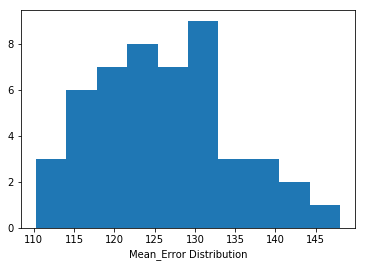

In [29]:
plt.hist(mean_norm_100_error)
plt.xlabel("Mean_Error Distribution")
plt.show()

Discussion: Now in the third case, we have changed the training epochs from 50 to 100. We have got Mean of mean squared errors as 126.284 which is almost same as with 50 epochs 125.973. It is a slight increase in the error. But the main difference can be noted in the standard deviation of the errors. It has changed from 12.676 to 8.9303. So the errors is drawn towards the mean by increasing the epochs. It can be seen in the distribution plot as well. Increase in epochs does not improve the model here much when compared to the computational time required for training.

# Part D

In [30]:
#Repeat Part B with 3 Hidden Layers with 10 nodes

model_new = Sequential()
model_new.add(Dense(10, activation='relu', input_shape=(n_cols,)))
model_new.add(Dense(10, activation='relu'))
model_new.add(Dense(10, activation='relu'))
model_new.add(Dense(10, activation='relu'))
model_new.add(Dense(1))
model_new.compile(optimizer='adam', loss='mean_squared_error')

K = 50
mean_norm_3hidden_error = np.zeros((K-1))

for n in range(1,K):
    X_train, X_test, y_train, y_test = train_test_split( X_norm, y, test_size=0.3)
    #Train Model and Predict  
    model_new.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=2)
    yhat=model_new.predict(X_test)
    mean_norm_3hidden_error[n-1] = mean_squared_error(y_test, yhat)

mean_norm_3hidden_error

Train on 721 samples, validate on 309 samples
Epoch 1/50
 - 2s - loss: 1570.9912 - val_loss: 1507.4552
Epoch 2/50
 - 1s - loss: 1553.7568 - val_loss: 1483.5041
Epoch 3/50
 - 1s - loss: 1520.2220 - val_loss: 1438.0981
Epoch 4/50
 - 2s - loss: 1457.6883 - val_loss: 1352.6672
Epoch 5/50
 - 1s - loss: 1341.1313 - val_loss: 1198.0829
Epoch 6/50
 - 1s - loss: 1141.7377 - val_loss: 945.7040
Epoch 7/50
 - 1s - loss: 846.8911 - val_loss: 612.8200
Epoch 8/50
 - 1s - loss: 515.9290 - val_loss: 334.8648
Epoch 9/50
 - 1s - loss: 312.0320 - val_loss: 246.7772
Epoch 10/50
 - 1s - loss: 261.6894 - val_loss: 226.2138
Epoch 11/50
 - 1s - loss: 235.3625 - val_loss: 210.1078
Epoch 12/50
 - 1s - loss: 220.6098 - val_loss: 201.6176
Epoch 13/50
 - 1s - loss: 211.7066 - val_loss: 195.0085
Epoch 14/50
 - 1s - loss: 205.5487 - val_loss: 190.4217
Epoch 15/50
 - 2s - loss: 200.8302 - val_loss: 184.5698
Epoch 16/50
 - 1s - loss: 196.4146 - val_loss: 182.0417
Epoch 17/50
 - 1s - loss: 193.7860 - val_loss: 177.9181


 - 2s - loss: 132.0393 - val_loss: 128.6629
Epoch 46/50
 - 1s - loss: 132.3579 - val_loss: 127.7504
Epoch 47/50
 - 1s - loss: 131.7343 - val_loss: 128.6613
Epoch 48/50
 - 1s - loss: 131.8199 - val_loss: 127.7489
Epoch 49/50
 - 1s - loss: 132.3462 - val_loss: 128.1939
Epoch 50/50
 - 1s - loss: 131.3324 - val_loss: 128.5768
Train on 721 samples, validate on 309 samples
Epoch 1/50
 - 1s - loss: 133.9007 - val_loss: 125.0444
Epoch 2/50
 - 1s - loss: 133.1317 - val_loss: 126.9640
Epoch 3/50
 - 1s - loss: 131.7981 - val_loss: 128.0926
Epoch 4/50
 - 1s - loss: 131.1751 - val_loss: 129.0091
Epoch 5/50
 - 1s - loss: 131.3614 - val_loss: 129.2049
Epoch 6/50
 - 2s - loss: 130.6107 - val_loss: 129.0112
Epoch 7/50
 - 1s - loss: 130.9736 - val_loss: 129.8873
Epoch 8/50
 - 1s - loss: 130.3805 - val_loss: 128.9952
Epoch 9/50
 - 1s - loss: 130.7408 - val_loss: 129.4264
Epoch 10/50
 - 1s - loss: 129.7524 - val_loss: 130.4789
Epoch 11/50
 - 1s - loss: 130.2769 - val_loss: 130.3927
Epoch 12/50
 - 1s - los

Epoch 40/50
 - 1s - loss: 120.5105 - val_loss: 136.4793
Epoch 41/50
 - 1s - loss: 121.1700 - val_loss: 137.4495
Epoch 42/50
 - 1s - loss: 121.2383 - val_loss: 136.4308
Epoch 43/50
 - 1s - loss: 120.7831 - val_loss: 137.3084
Epoch 44/50
 - 1s - loss: 121.0297 - val_loss: 137.0593
Epoch 45/50
 - 1s - loss: 120.8552 - val_loss: 136.8935
Epoch 46/50
 - 1s - loss: 120.6025 - val_loss: 137.5561
Epoch 47/50
 - 1s - loss: 120.7499 - val_loss: 137.4605
Epoch 48/50
 - 2s - loss: 120.1312 - val_loss: 138.0896
Epoch 49/50
 - 2s - loss: 120.3257 - val_loss: 137.7415
Epoch 50/50
 - 1s - loss: 121.1221 - val_loss: 138.0782
Train on 721 samples, validate on 309 samples
Epoch 1/50
 - 1s - loss: 132.4472 - val_loss: 111.6891
Epoch 2/50
 - 1s - loss: 130.6464 - val_loss: 112.4357
Epoch 3/50
 - 1s - loss: 130.2670 - val_loss: 113.8630
Epoch 4/50
 - 1s - loss: 129.4794 - val_loss: 114.0549
Epoch 5/50
 - 1s - loss: 128.8592 - val_loss: 114.4754
Epoch 6/50
 - 1s - loss: 128.9629 - val_loss: 114.2462
Epoch 7/

Epoch 35/50
 - 1s - loss: 113.4475 - val_loss: 144.3597
Epoch 36/50
 - 1s - loss: 113.4316 - val_loss: 145.4573
Epoch 37/50
 - 1s - loss: 113.5407 - val_loss: 143.6419
Epoch 38/50
 - 2s - loss: 113.8764 - val_loss: 144.1581
Epoch 39/50
 - 1s - loss: 113.5040 - val_loss: 144.7799
Epoch 40/50
 - 1s - loss: 113.9160 - val_loss: 144.0525
Epoch 41/50
 - 1s - loss: 113.3761 - val_loss: 145.7046
Epoch 42/50
 - 1s - loss: 113.2011 - val_loss: 144.8063
Epoch 43/50
 - 1s - loss: 113.7287 - val_loss: 144.8866
Epoch 44/50
 - 1s - loss: 113.7662 - val_loss: 145.0344
Epoch 45/50
 - 1s - loss: 113.8271 - val_loss: 145.1552
Epoch 46/50
 - 1s - loss: 113.4696 - val_loss: 145.7583
Epoch 47/50
 - 1s - loss: 113.7723 - val_loss: 143.5090
Epoch 48/50
 - 1s - loss: 113.0055 - val_loss: 146.1601
Epoch 49/50
 - 1s - loss: 113.1068 - val_loss: 144.8974
Epoch 50/50
 - 1s - loss: 113.4739 - val_loss: 145.8086
Train on 721 samples, validate on 309 samples
Epoch 1/50
 - 1s - loss: 117.9351 - val_loss: 136.0951
Epo

Epoch 30/50
 - 1s - loss: 120.9020 - val_loss: 118.9848
Epoch 31/50
 - 1s - loss: 121.1128 - val_loss: 118.9775
Epoch 32/50
 - 1s - loss: 121.0382 - val_loss: 118.9771
Epoch 33/50
 - 1s - loss: 120.6881 - val_loss: 119.8528
Epoch 34/50
 - 1s - loss: 121.0459 - val_loss: 119.3204
Epoch 35/50
 - 1s - loss: 119.9861 - val_loss: 119.3044
Epoch 36/50
 - 1s - loss: 120.0291 - val_loss: 119.2035
Epoch 37/50
 - 1s - loss: 120.3966 - val_loss: 119.1935
Epoch 38/50
 - 1s - loss: 120.0602 - val_loss: 119.6923
Epoch 39/50
 - 1s - loss: 120.6098 - val_loss: 119.1937
Epoch 40/50
 - 2s - loss: 120.0042 - val_loss: 119.6398
Epoch 41/50
 - 1s - loss: 119.7938 - val_loss: 119.7367
Epoch 42/50
 - 1s - loss: 119.8919 - val_loss: 119.7586
Epoch 43/50
 - 1s - loss: 119.3848 - val_loss: 119.5385
Epoch 44/50
 - 1s - loss: 119.8869 - val_loss: 120.2454
Epoch 45/50
 - 1s - loss: 119.5142 - val_loss: 120.4734
Epoch 46/50
 - 1s - loss: 120.6053 - val_loss: 120.5960
Epoch 47/50
 - 1s - loss: 119.7103 - val_loss: 1

Epoch 25/50
 - 1s - loss: 115.1609 - val_loss: 125.2774
Epoch 26/50
 - 1s - loss: 115.0444 - val_loss: 125.5418
Epoch 27/50
 - 1s - loss: 114.9525 - val_loss: 125.8077
Epoch 28/50
 - 1s - loss: 114.9033 - val_loss: 125.7275
Epoch 29/50
 - 1s - loss: 115.3978 - val_loss: 126.3227
Epoch 30/50
 - 1s - loss: 115.7096 - val_loss: 125.6451
Epoch 31/50
 - 1s - loss: 114.8109 - val_loss: 125.3325
Epoch 32/50
 - 1s - loss: 115.4295 - val_loss: 125.1943
Epoch 33/50
 - 1s - loss: 115.4729 - val_loss: 126.5569
Epoch 34/50
 - 1s - loss: 114.9294 - val_loss: 125.3575
Epoch 35/50
 - 1s - loss: 115.2269 - val_loss: 126.2918
Epoch 36/50
 - 1s - loss: 114.9697 - val_loss: 126.2782
Epoch 37/50
 - 1s - loss: 115.0023 - val_loss: 125.1529
Epoch 38/50
 - 1s - loss: 114.9506 - val_loss: 125.2371
Epoch 39/50
 - 1s - loss: 115.3258 - val_loss: 126.6691
Epoch 40/50
 - 1s - loss: 114.7736 - val_loss: 126.5069
Epoch 41/50
 - 1s - loss: 114.7519 - val_loss: 127.5268
Epoch 42/50
 - 1s - loss: 114.4317 - val_loss: 1

Epoch 20/50
 - 1s - loss: 115.0298 - val_loss: 116.9852
Epoch 21/50
 - 1s - loss: 116.2543 - val_loss: 117.2766
Epoch 22/50
 - 1s - loss: 115.2344 - val_loss: 116.9607
Epoch 23/50
 - 1s - loss: 115.3213 - val_loss: 118.2707
Epoch 24/50
 - 1s - loss: 115.4646 - val_loss: 117.7423
Epoch 25/50
 - 1s - loss: 115.1426 - val_loss: 118.4609
Epoch 26/50
 - 1s - loss: 114.8904 - val_loss: 118.0397
Epoch 27/50
 - 1s - loss: 114.6325 - val_loss: 118.3231
Epoch 28/50
 - 1s - loss: 114.7742 - val_loss: 117.6248
Epoch 29/50
 - 1s - loss: 115.5692 - val_loss: 119.1780
Epoch 30/50
 - 1s - loss: 115.0200 - val_loss: 117.4734
Epoch 31/50
 - 1s - loss: 115.1164 - val_loss: 117.9733
Epoch 32/50
 - 1s - loss: 115.2250 - val_loss: 117.5505
Epoch 33/50
 - 1s - loss: 114.5189 - val_loss: 118.3546
Epoch 34/50
 - 1s - loss: 114.6297 - val_loss: 117.8998
Epoch 35/50
 - 1s - loss: 115.5054 - val_loss: 119.2495
Epoch 36/50
 - 1s - loss: 114.6074 - val_loss: 118.6101
Epoch 37/50
 - 1s - loss: 114.3852 - val_loss: 1

Epoch 15/50
 - 1s - loss: 113.5118 - val_loss: 118.3762
Epoch 16/50
 - 2s - loss: 111.7543 - val_loss: 117.5227
Epoch 17/50
 - 1s - loss: 111.9594 - val_loss: 118.0664
Epoch 18/50
 - 1s - loss: 112.2539 - val_loss: 117.5860
Epoch 19/50
 - 1s - loss: 111.8884 - val_loss: 118.2537
Epoch 20/50
 - 1s - loss: 112.6866 - val_loss: 122.2703
Epoch 21/50
 - 1s - loss: 114.7643 - val_loss: 119.1045
Epoch 22/50
 - 1s - loss: 112.5341 - val_loss: 120.3008
Epoch 23/50
 - 1s - loss: 111.3635 - val_loss: 118.9022
Epoch 24/50
 - 1s - loss: 111.2952 - val_loss: 119.7103
Epoch 25/50
 - 1s - loss: 111.7389 - val_loss: 119.1168
Epoch 26/50
 - 1s - loss: 111.6631 - val_loss: 120.3451
Epoch 27/50
 - 1s - loss: 111.6253 - val_loss: 119.3425
Epoch 28/50
 - 1s - loss: 110.8965 - val_loss: 119.6765
Epoch 29/50
 - 1s - loss: 111.4403 - val_loss: 121.8429
Epoch 30/50
 - 1s - loss: 111.5086 - val_loss: 120.3427
Epoch 31/50
 - 1s - loss: 111.3601 - val_loss: 120.6743
Epoch 32/50
 - 1s - loss: 111.4881 - val_loss: 1

Epoch 10/50
 - 1s - loss: 110.6727 - val_loss: 120.0466
Epoch 11/50
 - 1s - loss: 110.6747 - val_loss: 121.2331
Epoch 12/50
 - 1s - loss: 110.2624 - val_loss: 120.8361
Epoch 13/50
 - 1s - loss: 110.0782 - val_loss: 122.0772
Epoch 14/50
 - 1s - loss: 109.7093 - val_loss: 121.2087
Epoch 15/50
 - 1s - loss: 109.7159 - val_loss: 123.2256
Epoch 16/50
 - 1s - loss: 110.0147 - val_loss: 123.7122
Epoch 17/50
 - 1s - loss: 109.4718 - val_loss: 121.9834
Epoch 18/50
 - 2s - loss: 109.4810 - val_loss: 123.3787
Epoch 19/50
 - 1s - loss: 109.4730 - val_loss: 123.9940
Epoch 20/50
 - 1s - loss: 110.8917 - val_loss: 127.5525
Epoch 21/50
 - 1s - loss: 109.7301 - val_loss: 125.3166
Epoch 22/50
 - 1s - loss: 109.3199 - val_loss: 124.3274
Epoch 23/50
 - 1s - loss: 108.9607 - val_loss: 124.4684
Epoch 24/50
 - 1s - loss: 108.9815 - val_loss: 124.7072
Epoch 25/50
 - 1s - loss: 109.1544 - val_loss: 125.2584
Epoch 26/50
 - 1s - loss: 108.7735 - val_loss: 125.4353
Epoch 27/50
 - 1s - loss: 109.0162 - val_loss: 1

Epoch 5/50
 - 1s - loss: 110.1256 - val_loss: 116.5245
Epoch 6/50
 - 1s - loss: 109.3064 - val_loss: 117.2925
Epoch 7/50
 - 1s - loss: 109.6023 - val_loss: 117.4539
Epoch 8/50
 - 1s - loss: 109.1180 - val_loss: 118.3715
Epoch 9/50
 - 1s - loss: 108.9183 - val_loss: 117.7191
Epoch 10/50
 - 2s - loss: 109.5784 - val_loss: 118.2893
Epoch 11/50
 - 1s - loss: 109.0380 - val_loss: 119.3317
Epoch 12/50
 - 1s - loss: 108.6011 - val_loss: 120.8396
Epoch 13/50
 - 1s - loss: 109.2229 - val_loss: 120.3636
Epoch 14/50
 - 1s - loss: 110.1557 - val_loss: 119.5901
Epoch 15/50
 - 1s - loss: 109.1800 - val_loss: 121.0520
Epoch 16/50
 - 1s - loss: 108.7949 - val_loss: 119.9909
Epoch 17/50
 - 1s - loss: 108.6406 - val_loss: 120.0470
Epoch 18/50
 - 1s - loss: 108.1183 - val_loss: 120.7716
Epoch 19/50
 - 1s - loss: 108.7095 - val_loss: 120.6004
Epoch 20/50
 - 1s - loss: 107.9483 - val_loss: 121.3603
Epoch 21/50
 - 2s - loss: 108.0780 - val_loss: 120.8648
Epoch 22/50
 - 1s - loss: 107.0660 - val_loss: 121.36

 - 1s - loss: 110.9648 - val_loss: 114.5458
Train on 721 samples, validate on 309 samples
Epoch 1/50
 - 1s - loss: 114.1813 - val_loss: 108.7516
Epoch 2/50
 - 1s - loss: 112.9261 - val_loss: 110.6556
Epoch 3/50
 - 1s - loss: 111.6525 - val_loss: 112.7463
Epoch 4/50
 - 1s - loss: 112.4771 - val_loss: 113.7912
Epoch 5/50
 - 1s - loss: 111.9161 - val_loss: 114.1463
Epoch 6/50
 - 1s - loss: 111.7274 - val_loss: 115.6651
Epoch 7/50
 - 1s - loss: 111.8911 - val_loss: 117.5469
Epoch 8/50
 - 1s - loss: 111.9544 - val_loss: 115.1479
Epoch 9/50
 - 1s - loss: 110.7014 - val_loss: 116.6069
Epoch 10/50
 - 1s - loss: 110.4759 - val_loss: 116.4005
Epoch 11/50
 - 1s - loss: 110.1852 - val_loss: 116.2351
Epoch 12/50
 - 1s - loss: 110.1368 - val_loss: 117.3729
Epoch 13/50
 - 1s - loss: 110.1594 - val_loss: 116.6579
Epoch 14/50
 - 2s - loss: 110.2425 - val_loss: 116.7434
Epoch 15/50
 - 1s - loss: 110.2113 - val_loss: 117.3507
Epoch 16/50
 - 1s - loss: 111.0644 - val_loss: 117.8983
Epoch 17/50
 - 1s - los

Epoch 45/50
 - 2s - loss: 104.1805 - val_loss: 127.3089
Epoch 46/50
 - 1s - loss: 103.3529 - val_loss: 127.6500
Epoch 47/50
 - 1s - loss: 103.8719 - val_loss: 127.8213
Epoch 48/50
 - 1s - loss: 103.7094 - val_loss: 127.0144
Epoch 49/50
 - 1s - loss: 103.2133 - val_loss: 128.1970
Epoch 50/50
 - 1s - loss: 104.6905 - val_loss: 127.6340
Train on 721 samples, validate on 309 samples
Epoch 1/50
 - 1s - loss: 108.4673 - val_loss: 117.3466
Epoch 2/50
 - 1s - loss: 107.8392 - val_loss: 117.5356
Epoch 3/50
 - 1s - loss: 107.7080 - val_loss: 118.5792
Epoch 4/50
 - 1s - loss: 107.3012 - val_loss: 118.6089
Epoch 5/50
 - 1s - loss: 106.8117 - val_loss: 118.9483
Epoch 6/50
 - 2s - loss: 107.1478 - val_loss: 119.4363
Epoch 7/50
 - 1s - loss: 106.4254 - val_loss: 120.2446
Epoch 8/50
 - 1s - loss: 106.4026 - val_loss: 120.3696
Epoch 9/50
 - 1s - loss: 106.1159 - val_loss: 121.1948
Epoch 10/50
 - 1s - loss: 106.0427 - val_loss: 120.9836
Epoch 11/50
 - 1s - loss: 105.9778 - val_loss: 120.7348
Epoch 12/50

Epoch 40/50
 - 1s - loss: 104.4568 - val_loss: 135.0864
Epoch 41/50
 - 1s - loss: 104.1825 - val_loss: 133.1028
Epoch 42/50
 - 1s - loss: 103.2881 - val_loss: 131.6812
Epoch 43/50
 - 1s - loss: 103.6082 - val_loss: 132.8894
Epoch 44/50
 - 1s - loss: 103.4810 - val_loss: 134.1457
Epoch 45/50
 - 1s - loss: 103.5895 - val_loss: 134.2171
Epoch 46/50
 - 1s - loss: 102.8769 - val_loss: 131.3764
Epoch 47/50
 - 1s - loss: 103.5562 - val_loss: 134.5659
Epoch 48/50
 - 1s - loss: 103.3035 - val_loss: 132.4780
Epoch 49/50
 - 1s - loss: 103.0349 - val_loss: 134.0095
Epoch 50/50
 - 1s - loss: 102.9985 - val_loss: 135.5584
Train on 721 samples, validate on 309 samples
Epoch 1/50
 - 1s - loss: 111.7699 - val_loss: 111.8309
Epoch 2/50
 - 1s - loss: 111.1577 - val_loss: 116.2525
Epoch 3/50
 - 1s - loss: 109.8889 - val_loss: 113.4089
Epoch 4/50
 - 1s - loss: 109.7830 - val_loss: 117.2292
Epoch 5/50
 - 1s - loss: 109.9668 - val_loss: 113.1634
Epoch 6/50
 - 1s - loss: 109.5634 - val_loss: 114.9399
Epoch 7/

Epoch 35/50
 - 1s - loss: 107.4770 - val_loss: 118.9126
Epoch 36/50
 - 1s - loss: 107.7600 - val_loss: 119.0913
Epoch 37/50
 - 1s - loss: 107.9384 - val_loss: 119.4816
Epoch 38/50
 - 1s - loss: 107.3258 - val_loss: 119.0771
Epoch 39/50
 - 1s - loss: 107.2868 - val_loss: 118.9262
Epoch 40/50
 - 1s - loss: 108.8664 - val_loss: 119.4713
Epoch 41/50
 - 1s - loss: 107.9052 - val_loss: 119.6356
Epoch 42/50
 - 1s - loss: 107.6276 - val_loss: 120.4920
Epoch 43/50
 - 1s - loss: 108.0893 - val_loss: 119.3634
Epoch 44/50
 - 1s - loss: 108.2672 - val_loss: 119.2958
Epoch 45/50
 - 1s - loss: 107.5446 - val_loss: 119.2896
Epoch 46/50
 - 1s - loss: 107.7864 - val_loss: 119.7604
Epoch 47/50
 - 1s - loss: 107.0405 - val_loss: 119.6265
Epoch 48/50
 - 1s - loss: 106.9167 - val_loss: 119.0692
Epoch 49/50
 - 1s - loss: 107.5260 - val_loss: 119.4049
Epoch 50/50
 - 1s - loss: 107.5336 - val_loss: 120.0960
Train on 721 samples, validate on 309 samples
Epoch 1/50
 - 2s - loss: 110.3469 - val_loss: 111.6206
Epo

 - 1s - loss: 101.3674 - val_loss: 130.0061
Epoch 31/50
 - 1s - loss: 102.6192 - val_loss: 131.2436
Epoch 32/50
 - 1s - loss: 101.2191 - val_loss: 131.5671
Epoch 33/50
 - 1s - loss: 101.3906 - val_loss: 135.4386
Epoch 34/50
 - 1s - loss: 101.6296 - val_loss: 130.1644
Epoch 35/50
 - 1s - loss: 101.3774 - val_loss: 132.8893
Epoch 36/50
 - 1s - loss: 101.2392 - val_loss: 130.9406
Epoch 37/50
 - 1s - loss: 101.1607 - val_loss: 132.3518
Epoch 38/50
 - 1s - loss: 102.1830 - val_loss: 136.0976
Epoch 39/50
 - 1s - loss: 100.8826 - val_loss: 131.4653
Epoch 40/50
 - 1s - loss: 101.3788 - val_loss: 136.9856
Epoch 41/50
 - 1s - loss: 101.4524 - val_loss: 133.1368
Epoch 42/50
 - 1s - loss: 100.7348 - val_loss: 134.7778
Epoch 43/50
 - 1s - loss: 100.7126 - val_loss: 134.8407
Epoch 44/50
 - 1s - loss: 100.8264 - val_loss: 132.4348
Epoch 45/50
 - 1s - loss: 100.7662 - val_loss: 135.1922
Epoch 46/50
 - 1s - loss: 100.4013 - val_loss: 132.3737
Epoch 47/50
 - 1s - loss: 101.2365 - val_loss: 136.8382
Epoc

Epoch 25/50
 - 1s - loss: 109.2720 - val_loss: 114.4368
Epoch 26/50
 - 1s - loss: 108.9627 - val_loss: 112.5388
Epoch 27/50
 - 1s - loss: 108.5135 - val_loss: 114.0776
Epoch 28/50
 - 1s - loss: 108.4936 - val_loss: 113.0107
Epoch 29/50
 - 1s - loss: 109.1982 - val_loss: 111.3839
Epoch 30/50
 - 1s - loss: 109.6249 - val_loss: 115.8292
Epoch 31/50
 - 1s - loss: 108.1578 - val_loss: 113.5602
Epoch 32/50
 - 1s - loss: 107.8720 - val_loss: 114.6116
Epoch 33/50
 - 1s - loss: 109.4835 - val_loss: 113.0435
Epoch 34/50
 - 1s - loss: 108.4547 - val_loss: 115.4566
Epoch 35/50
 - 2s - loss: 108.8732 - val_loss: 114.4259
Epoch 36/50
 - 1s - loss: 107.7022 - val_loss: 114.3897
Epoch 37/50
 - 1s - loss: 107.7694 - val_loss: 114.9641
Epoch 38/50
 - 1s - loss: 109.1812 - val_loss: 113.6811
Epoch 39/50
 - 1s - loss: 108.3224 - val_loss: 115.8866
Epoch 40/50
 - 1s - loss: 107.8221 - val_loss: 114.5283
Epoch 41/50
 - 1s - loss: 108.2493 - val_loss: 115.6264
Epoch 42/50
 - 1s - loss: 107.6648 - val_loss: 1

Epoch 20/50
 - 1s - loss: 106.0850 - val_loss: 123.5423
Epoch 21/50
 - 1s - loss: 104.8759 - val_loss: 125.7525
Epoch 22/50
 - 1s - loss: 104.3617 - val_loss: 124.7454
Epoch 23/50
 - 1s - loss: 104.1698 - val_loss: 125.6751
Epoch 24/50
 - 1s - loss: 104.3895 - val_loss: 125.3001
Epoch 25/50
 - 1s - loss: 104.1959 - val_loss: 125.7523
Epoch 26/50
 - 1s - loss: 104.2980 - val_loss: 126.3342
Epoch 27/50
 - 2s - loss: 104.4157 - val_loss: 126.3072
Epoch 28/50
 - 1s - loss: 104.7733 - val_loss: 128.7683
Epoch 29/50
 - 1s - loss: 104.8558 - val_loss: 126.8320
Epoch 30/50
 - 1s - loss: 104.8380 - val_loss: 127.7919
Epoch 31/50
 - 1s - loss: 105.1412 - val_loss: 127.3411
Epoch 32/50
 - 1s - loss: 104.3936 - val_loss: 128.0787
Epoch 33/50
 - 1s - loss: 104.5714 - val_loss: 129.2287
Epoch 34/50
 - 1s - loss: 103.7421 - val_loss: 127.9610
Epoch 35/50
 - 1s - loss: 104.5230 - val_loss: 129.0351
Epoch 36/50
 - 1s - loss: 104.8141 - val_loss: 128.9294
Epoch 37/50
 - 1s - loss: 104.7368 - val_loss: 1

array([143.3207352 , 151.44483533, 128.57682581, 135.6678568 ,
       139.41454035, 138.07816313, 120.17076922, 132.53886721,
       145.80855931, 145.01146463, 148.22074358, 120.25687224,
       130.52504399, 132.57600791, 127.44457954, 154.93318322,
       111.9058964 , 118.43530018, 127.61134737, 131.64940914,
       124.13550328, 125.76402108, 130.79491461, 130.25247647,
       133.00476223, 127.19845926, 125.92423275, 119.89984624,
       114.54582463, 121.82749718, 119.00324737, 127.634045  ,
       128.84232298, 118.92112571, 135.55840088, 119.88358347,
       128.08234067, 120.09602279, 121.96398483, 140.85858724,
       134.59021194, 129.65591657, 123.69171278, 116.42121066,
       117.61028073, 132.08550142, 131.00885258, 122.85182411,
       139.87383394])

In [31]:
print('Mean of Mean Squared Errors with 100 epochs is ',mean_norm_3hidden_error.mean())
print('Standard deviation of Mean Squared Errors with 100 epochs is ',mean_norm_3hidden_error.std())

Mean of Mean Squared Errors with 100 epochs is  129.5014600812932
Standard deviation of Mean Squared Errors with 100 epochs is  9.729163396927866


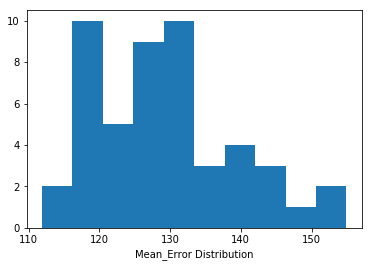

In [32]:
plt.hist(mean_norm_3hidden_error)
plt.xlabel("Mean_Error Distribution")
plt.show()

Discussion: In this last part, we have increased the number of hidden layers from 1 to 3. In this case here, we can see that the model did not improve with that. Mean of error increased from 125.973 to 129.501 but the standard devation has improved from 12.6763 to 9.7291. The errors distribution has been more towards the mean as we can see in the plot. So accoring to this test, we think the model will perform better with 1 hidden layer than 3 hidden layer. Maybe by increasing the nodes, we can get much more improved model with less mean squared error.

Thank You. !!!